<a href="https://colab.research.google.com/github/AmitG-98/MSc-Data-Science-Final-Project/blob/main/Global_macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Global Macroeconomic Indicator Dashboard with Predictive Analytics**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install Dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.express as px
from dash import Dash, html, dcc, Input, Output
from tabulate import tabulate
from sklearn.linear_model import LinearRegression

In [4]:
""" To see weather te data set is working we will try to read data set"""
df = pd.read_csv('/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69


In [5]:
""" Here we have written a funtion incoomon for all data sets to clean them """
def clean_csv(file_path, cleaned_file_path):
    """
    Cleans a CSV file by removing metadata, ensuring consistent column counts,
    and handling encoding issues like BOM.

    Args:
        file_path (str): Path to the input CSV file.
        cleaned_file_path (str): Path to save the cleaned CSV file.
    """
    # Step 1: Open and read the raw content of the file
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_content = file.readlines()

    # Step 2: Remove empty lines and whitespace
    cleaned_content = [line.strip() for line in raw_content if line.strip()]

    # Step 3: Identify the header row (adjust "Header Keyword" as needed)
    header_index = next((i for i, line in enumerate(cleaned_content) if "Country Name" in line), 0)

    # Extract the actual data starting from the header row
    cleaned_content = cleaned_content[header_index:]

    # Step 4: Save the cleaned content back to a CSV file
    with open(cleaned_file_path, 'w', encoding='utf-8') as file:
        file.write("\n".join(cleaned_content))

    # Step 5: Load the cleaned CSV to ensure consistency
    try:
        data = pd.read_csv(cleaned_file_path)
        print("Dataset preview:")
        print(data.head())  # Preview cleaned data
        print("\nDataset info:")
        print(data.info())  # Check structure and missing values

        # Optionally save the cleaned dataset again
        data.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned CSV saved to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error reading cleaned file: {e}")

In [6]:
"""Gdp Growth"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/GDP Growth(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""unemployment"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Unemployment.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Unemployment(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Real interest rate"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Real Interest rate.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Real Interest rate(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Inflation"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Inflation ,Consumer.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Inflation(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)


"""Houseold"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Houseolld final consmption.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Houseolld(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Stock Data"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/stock data.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/stock(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""CPIA"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/CPIA.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/CPIA(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

Dataset preview:
                  Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN  0.460106  7.868013  5.616400  4.668135  5.138990   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.873455  3.707643  7.145784  5.406403  4.102491   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

   ...      2015      2016      2017      2018      2019       2020  \
0  ... -0.

In [7]:


# Paths of the datasets
dataset_paths = [
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/CPIA(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/GDP Growth(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Houseolld(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Inflation(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Real Interest rate(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Unemployment(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/stock(c).csv",

]

# Columns to drop
columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68']
years_to_drop = [str(year) for year in range(1960, 1990)]  # Drop years before 1990

# Create an empty list to store the cleaned datasets
dataframes = []

# Process each dataset
for path in dataset_paths:
    df = pd.read_csv(path)

    # Drop unnecessary columns
    df = df.drop(columns=columns_to_drop + years_to_drop, errors='ignore')

    # Get the list of countries present in the current dataset
    countries_in_data = df['Country Name'].unique()

    # Optional: If you want to filter for certain countries, you can set the list of countries here
    # all_countries = ['Country1', 'Country2', 'Country3', ...]
    # df = df[df['Country Name'].isin(all_countries)]

    # Calculate the percentage of missing values for each country
    missing_percentage = df.isnull().mean(axis=1)

    # Define a threshold for dropping countries (e.g., remove countries with > 30% missing data)
    threshold = 0.3  # 30% missing data
    df = df[missing_percentage <= threshold]

    # Reset index after dropping rows
    df.reset_index(drop=True, inplace=True)

    # Add a source column for identifying the dataset
    df['Indicator'] = path.split("/")[-1].replace("(c).csv", "")

    # Append the cleaned dataframe to the list
    dataframes.append(df)

# Combine all datasets into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataset
output_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Combined_Dataset.csv"
combined_df.to_csv(output_path, index=False)

# Display the first few rows of the combined dataset
combined_df.head()


Country Name      1990       1991      1992       1993  \
0                        Aruba  3.961402   7.962872  5.882354   7.307693   
1  Africa Eastern and Southern  0.182031  -0.092709 -2.355109  -0.591581   
2   Africa Western and Central  5.773828   1.009365  2.483663  -1.317609   
3                       Angola -3.450099   0.991359 -5.838281 -23.983417   
4                      Albania -9.575640 -28.002142 -7.187111   9.559412   

       1994       1995       1996       1997      1998  ...      2015  \
0  8.203901   2.547144   1.185789   7.046875  1.991984  ... -0.623626   
1  1.899017   4.283193   5.454772   3.838778  1.758375  ...  3.011572   
2 -0.323481   1.919113   4.649809   4.447027  3.609312  ...  2.813979   
3  1.339363  15.000000  13.544370   7.274277  4.691146  ...  0.943572   
4  8.302867  13.322333   9.099999 -10.919984  8.829424  ...  2.218726   

       2016      2017      2018      2019       2020       2021       2022  \
0  1.719625  7.048533  2.381730 -2.302836 -23.982581  27.639357  10.458317   
1  2.183581  2.651400  2.681718  2.189259  -2.780379   4.497380   3.554422   
2  0.141489  2.284961  2.842645  3.222029  -1.004417   3.994854   3.784486   
3 -2.580111 -0.147150 -1.316362 -0.702273  -5.638215   1.199211   3.045403   
4  3.314981  3.802599  4.019346  2.087712  -3.302082   8.908528   4.856402   

       2023   Indicator  
0       NaN  GDP Growth  
1  2.622310  GDP Growth  
2  3.342776  GDP Growth  
3  0.856001  GDP Growth  
4  3.439149  GDP Growth  

[5 rows x 36 columns]

In [21]:
# Load your dataset (update the file path accordingly)
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Combined_Dataset.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Fill missing values
df_cleaned = df.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)

# Save the cleaned dataset to a new location
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'  # Replace with your desired output path
df_cleaned.to_csv(output_path, index=False)

print(f"Missing values filled and dataset saved to: {output_path}")

Missing values filled and dataset saved to: /content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv


<ipython-input-21-f1adb8ae5f91>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)


In [35]:
# Define developed and developing countries
developed_countries = ["United States", "Germany", "Japan", "United Kingdom", "Canada","Australia","France","Italy","Sweden", "Netherlands"]
developing_countries = ["India", "Brazil", "China", "South Africa", "Indonesia", "Mexico", "Turkey", "Philippines", "Thailand", "Vietnam",
                        "Egypt", "Pakistan", "Bangladesh", "Nigeria", "Argentina"]
least_developed_countries =["Afghanistan","Madagascar","Nepal","Yemen","Ethiopia",'Colombia', 'Peru', 'Panama', 'Kenya']
# Split dataset
df_developed = df_cleaned[df_cleaned["Country Name"].isin(developed_countries)]
df_developing = df_cleaned[df_cleaned["Country Name"].isin(developing_countries)]
df_least_developed = df_cleaned[df_cleaned["Country Name"].isin(least_developed_countries)]

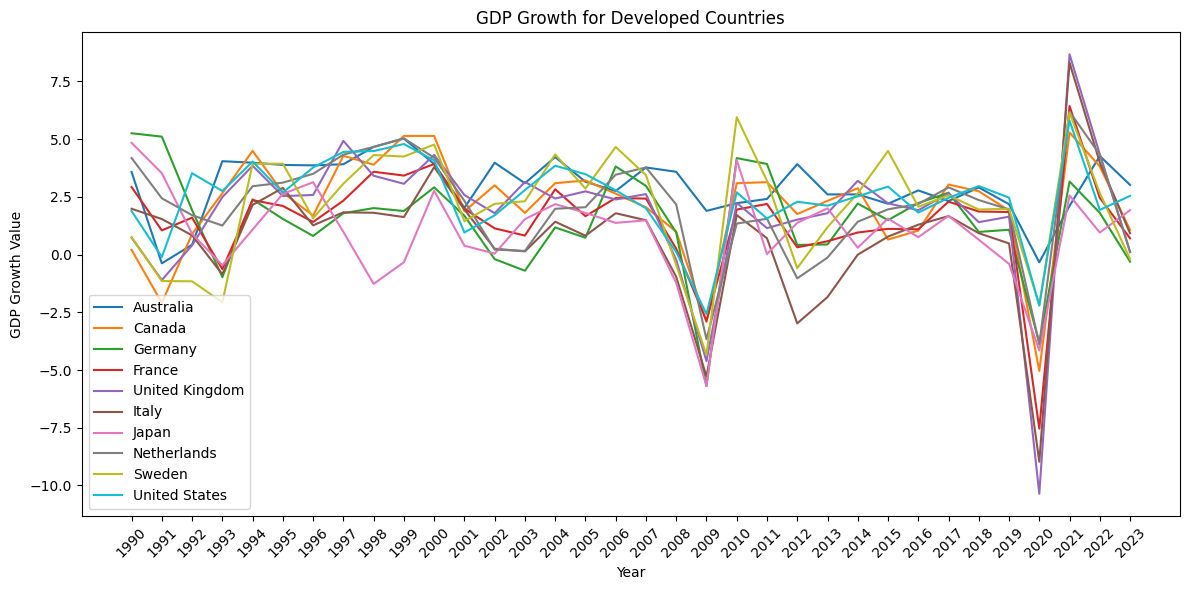

In [23]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'GDP Growth']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth Value')
plt.title('GDP Growth for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

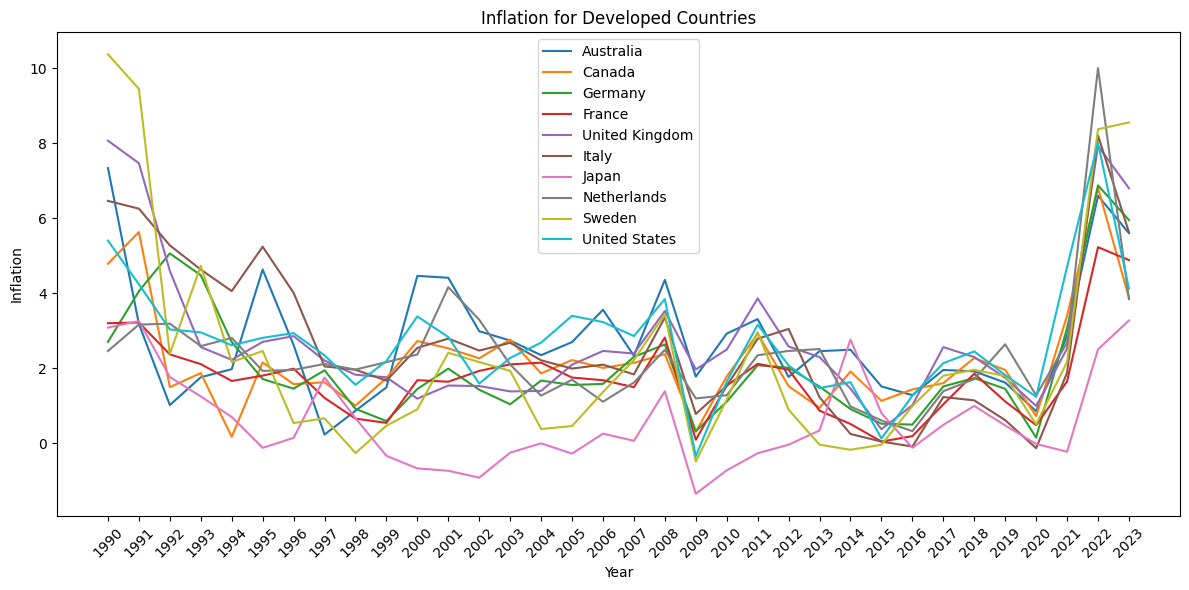

In [24]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Inflation']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Inflation')
plt.title('Inflation for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

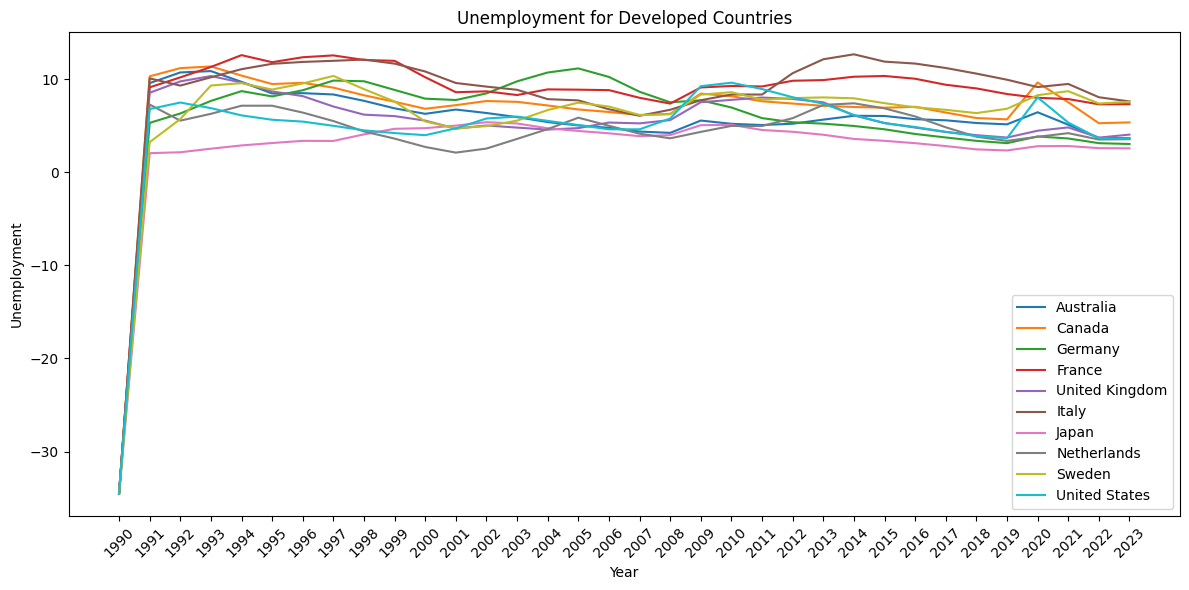

In [25]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Unemployment']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Unemployment')
plt.title('Unemployment for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

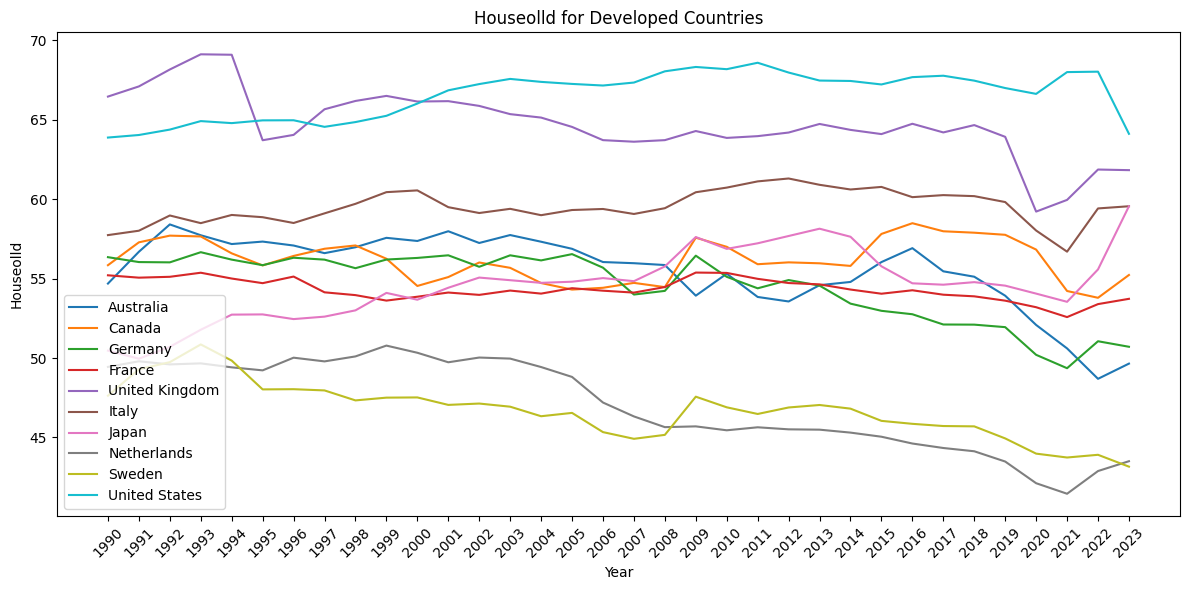

In [26]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Houseolld']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Houseolld')
plt.title('Houseolld for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

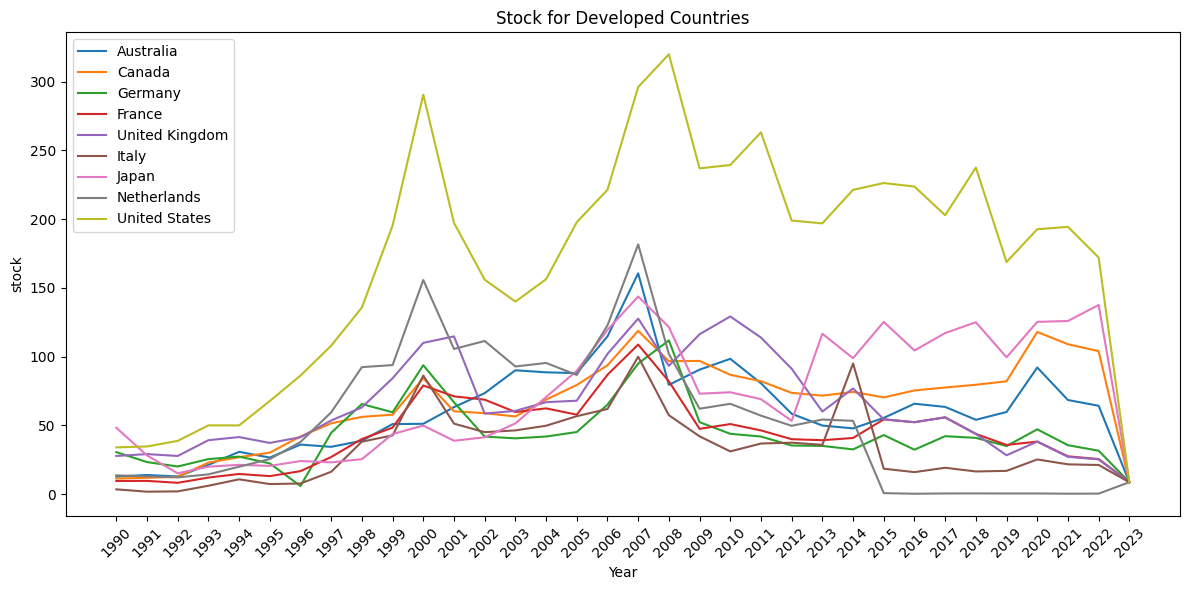

In [27]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'stock']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('stock')
plt.title('Stock for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

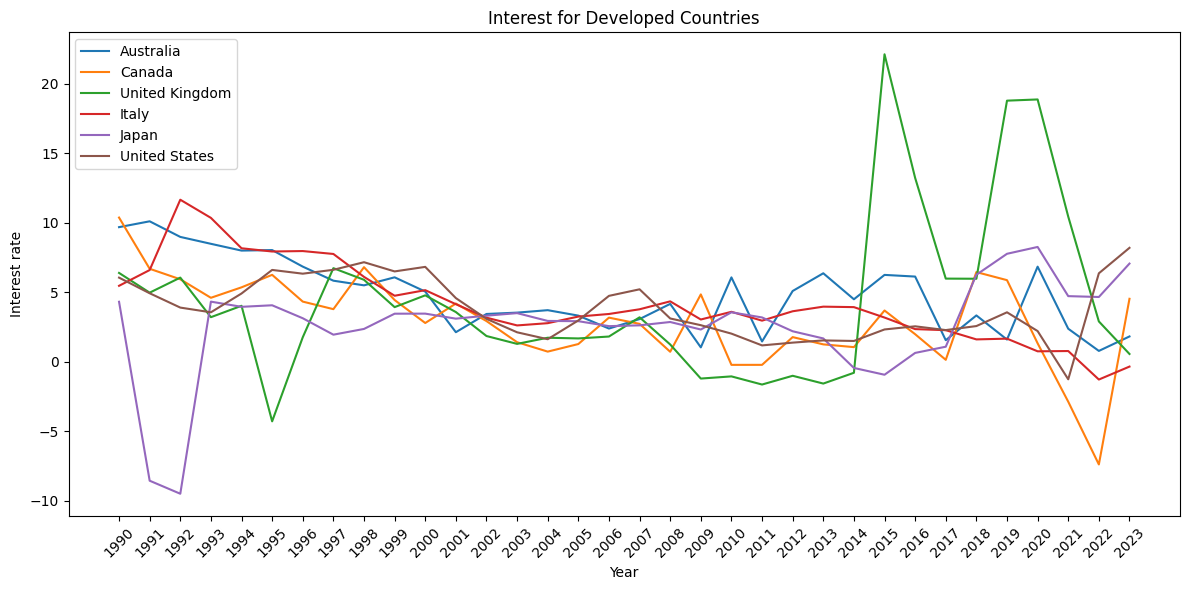

In [28]:
# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Filter for 'GDP Growth' indicator
gdp_growth_data = df_developed_melted[df_developed_melted['Indicator'] == 'Real Interest rate']

# Create the plot
plt.figure(figsize=(12, 6))
for country in gdp_growth_data['Country Name'].unique():
    country_data = gdp_growth_data[gdp_growth_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Interest rate')
plt.title('Interest for Developed Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

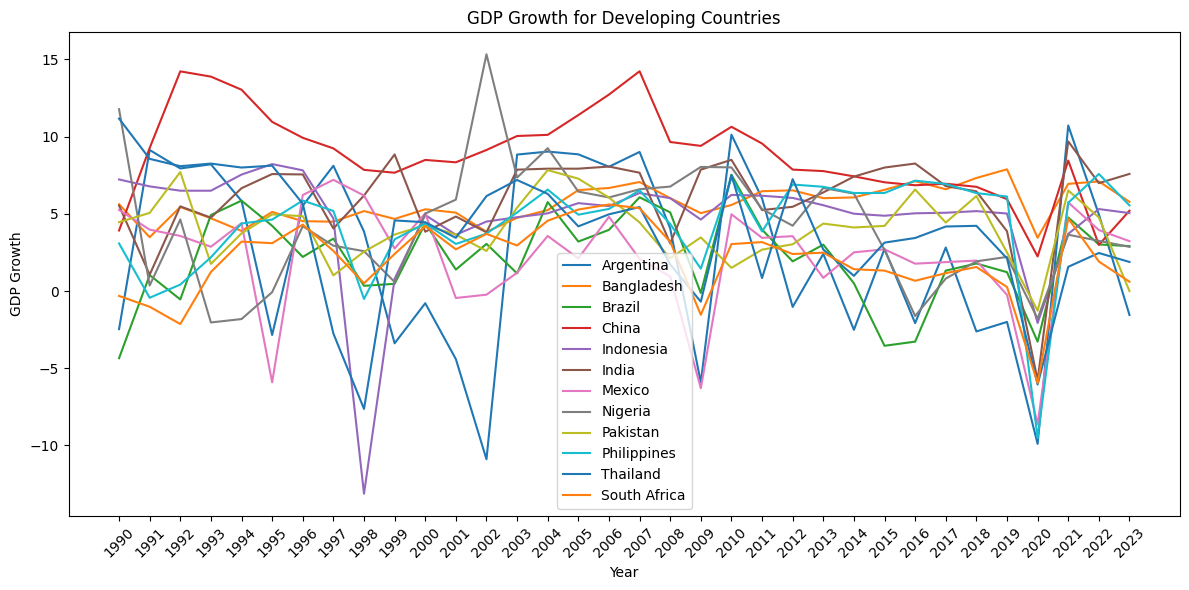

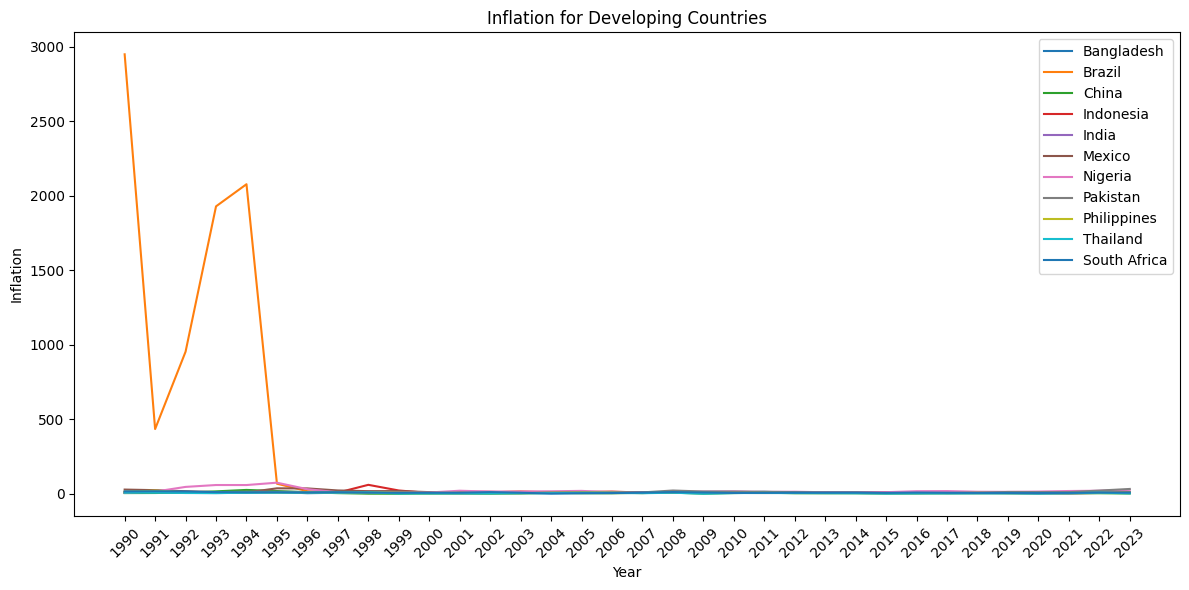

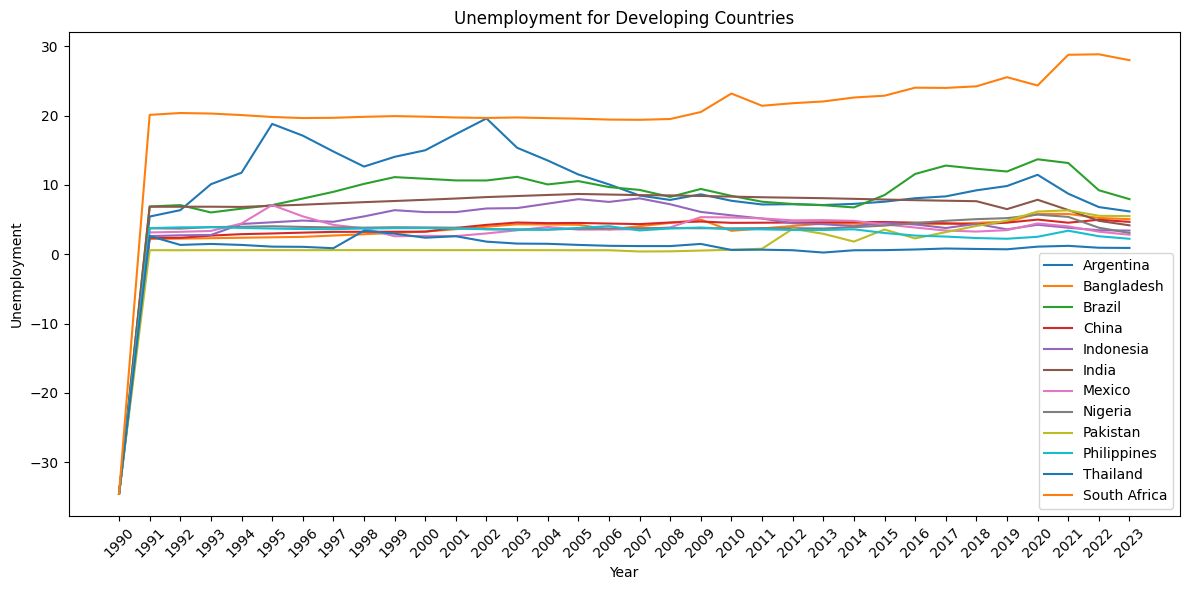

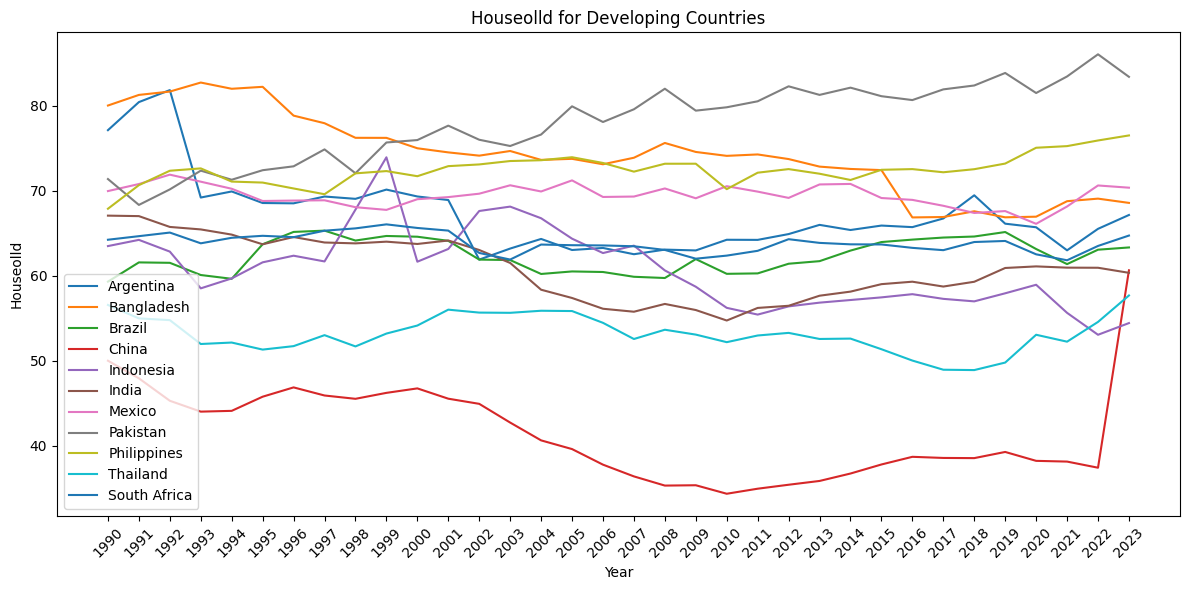

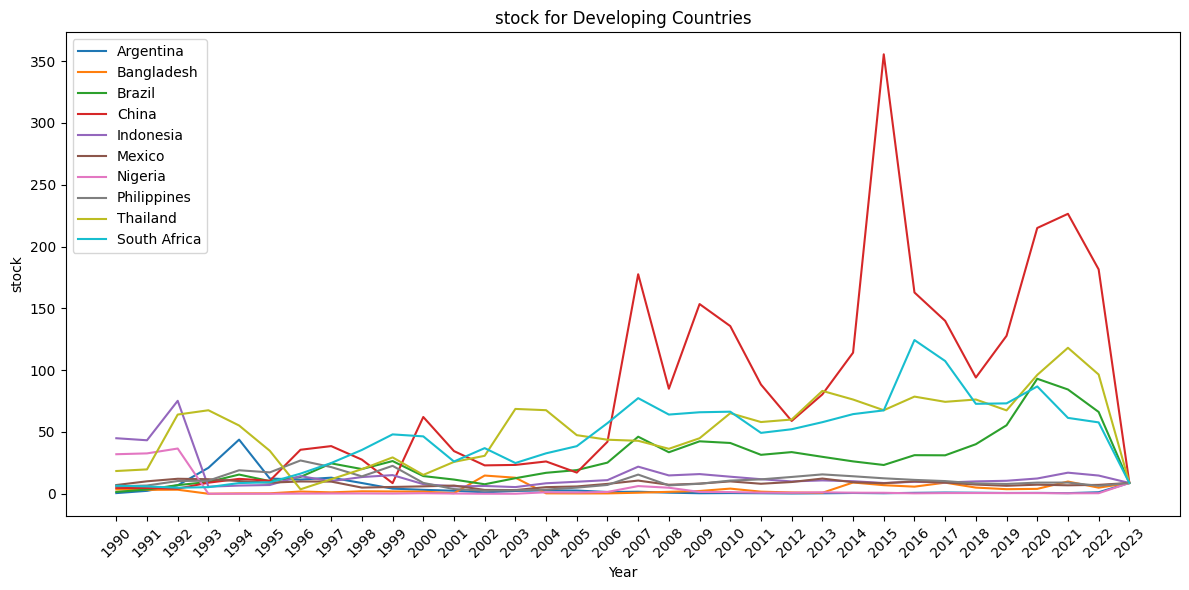

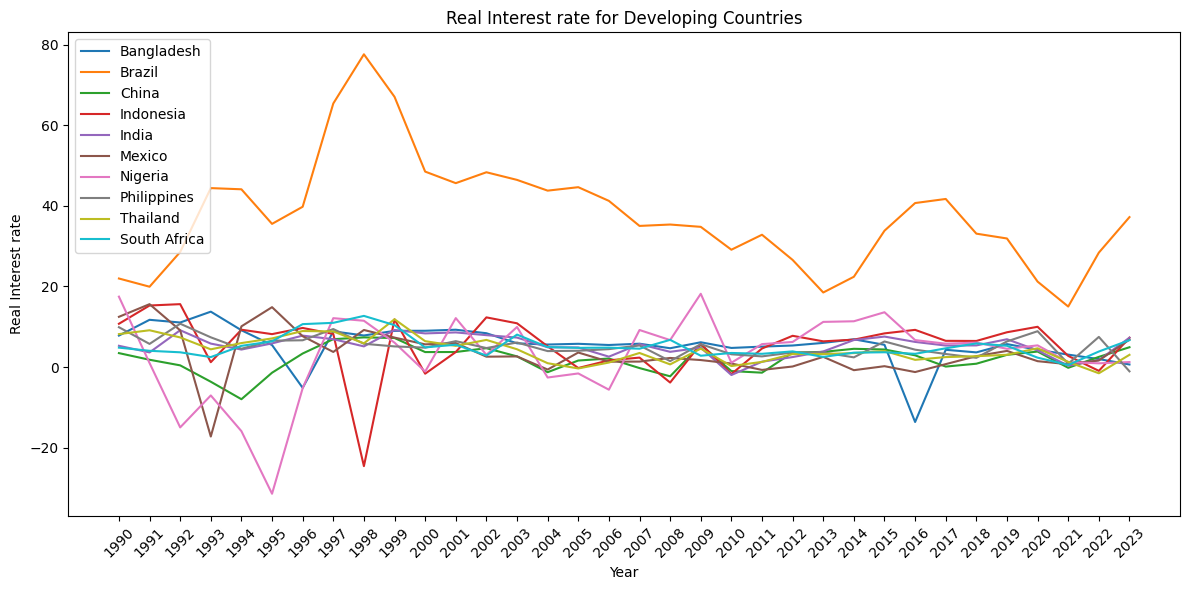

In [29]:
# prompt: genrate all this abve graphs for developing countries

# Reshape the data for plotting
df_developing_melted = df_developing.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Houseolld', 'stock', 'Real Interest rate']

for indicator in indicators:
    # Filter for the current indicator
    indicator_data = df_developing_melted[df_developing_melted['Indicator'] == indicator]

    # Create the plot
    plt.figure(figsize=(12, 6))
    for country in indicator_data['Country Name'].unique():
        country_data = indicator_data[indicator_data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], label=country)

    plt.xlabel('Year')
    plt.ylabel(indicator)  # Use the current indicator as the y-axis label
    plt.title(f'{indicator} for Developing Countries')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

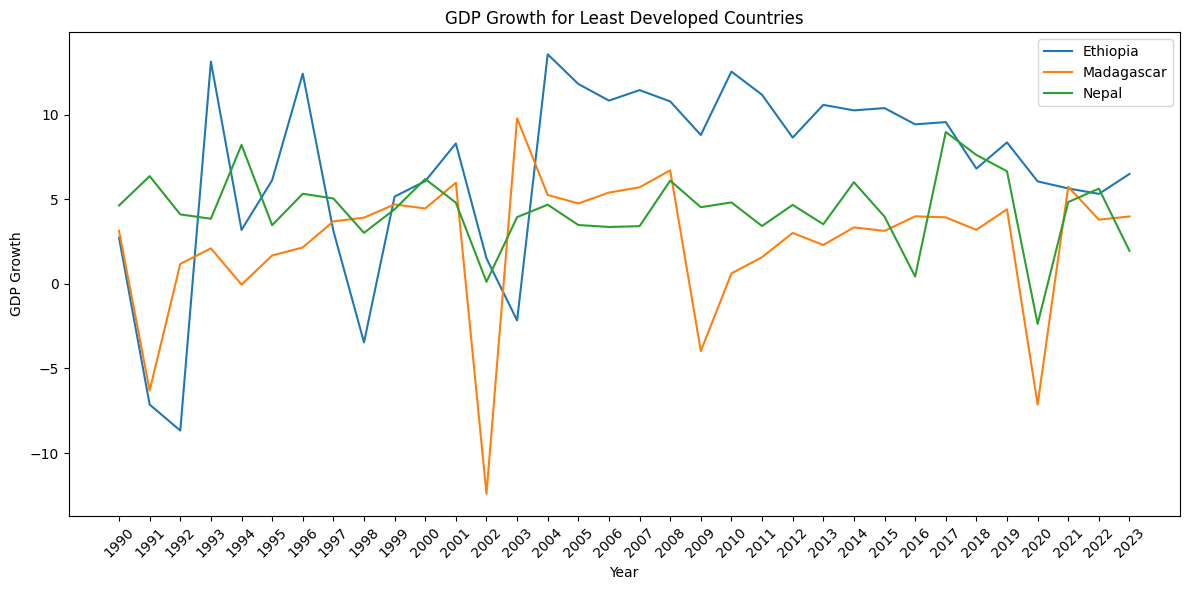

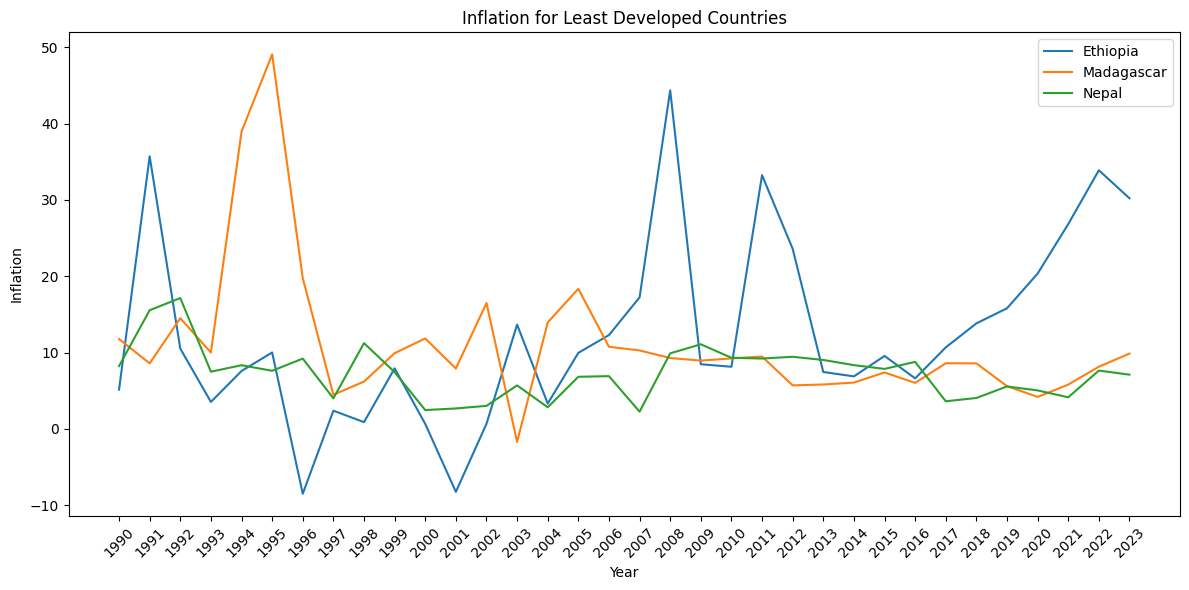

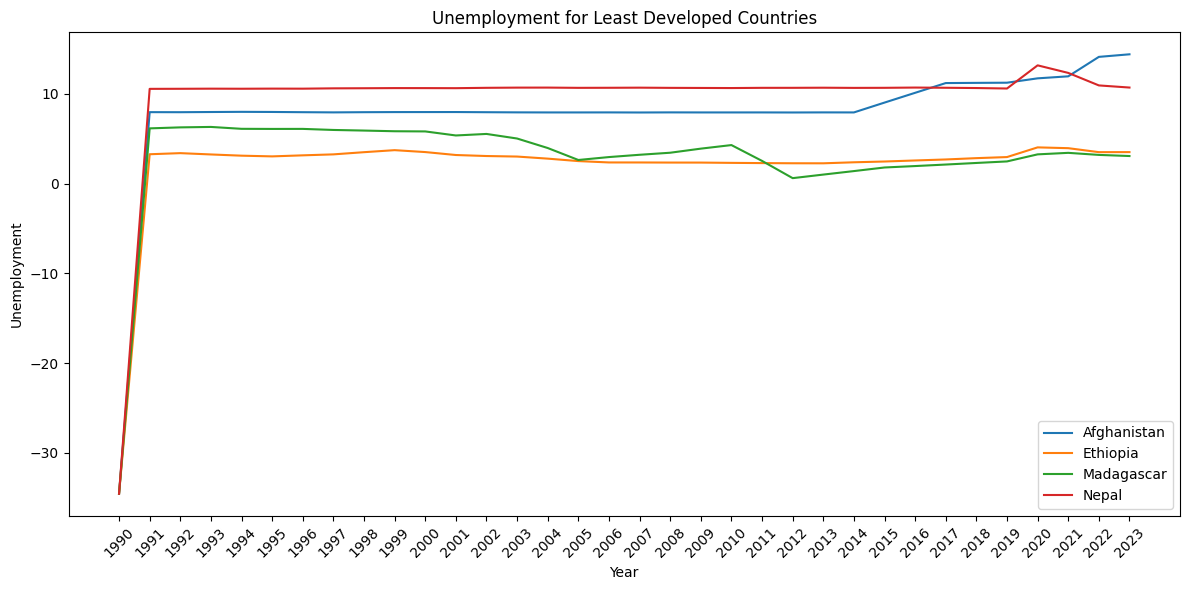

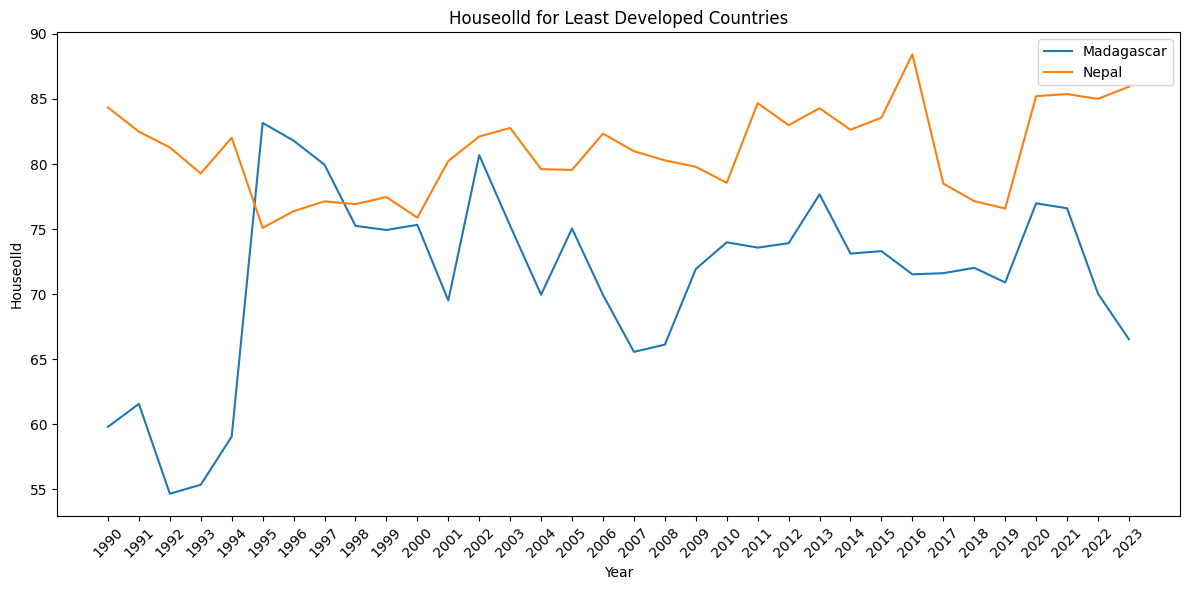

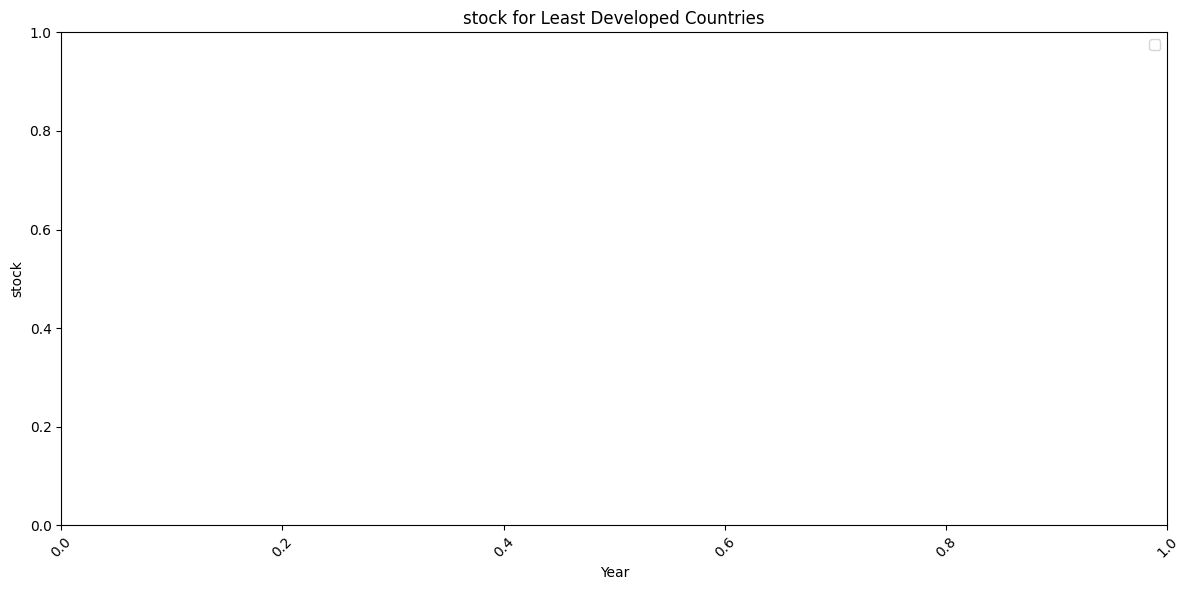

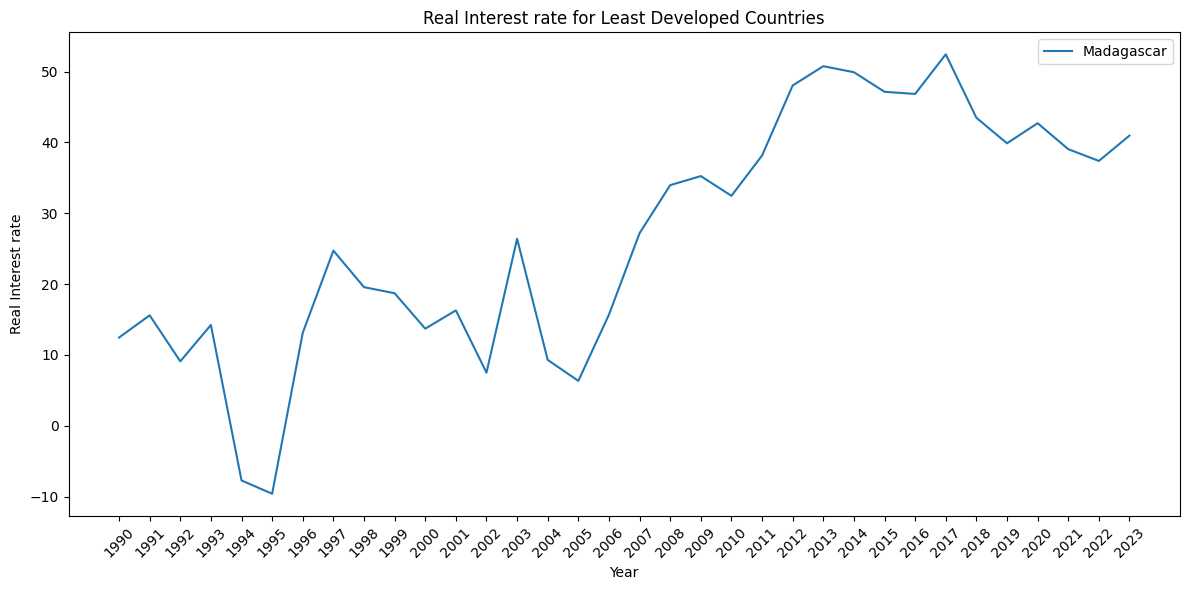

In [30]:
# prompt: genrate alll this above graphs for least developed countries

# For Least developed countries

# Reshape the data for plotting
df_least_developed_melted = df_least_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Houseolld', 'stock', 'Real Interest rate']

for indicator in indicators:
    # Filter for the current indicator
    indicator_data = df_least_developed_melted[df_least_developed_melted['Indicator'] == indicator]

    # Create the plot
    plt.figure(figsize=(12, 6))
    for country in indicator_data['Country Name'].unique():
        country_data = indicator_data[indicator_data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Value'], label=country)

    plt.xlabel('Year')
    plt.ylabel(indicator)  # Use the current indicator as the y-axis label
    plt.title(f'{indicator} for Least Developed Countries')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [31]:
# Print the list of common countries in table format
print("\ncommon_countries_across_indicators:\n")
print(tabulate([[country] for country in common_countries], headers=["Country"], tablefmt="grid"))


common_countries_across_indicators:

+------------------------------------------------------+
| Country                                              |
+======================================================+
| Africa Eastern and Southern                          |
+------------------------------------------------------+
| Africa Western and Central                           |
+------------------------------------------------------+
| Albania                                              |
+------------------------------------------------------+
| Algeria                                              |
+------------------------------------------------------+
| Angola                                               |
+------------------------------------------------------+
| Arab World                                           |
+------------------------------------------------------+
| Armenia                                              |
+-------------------------------------------------

In [32]:
# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the indicators of interest
indicators_of_interest = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest Rate','houseolld']

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = filtered_df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across the selected indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)

# Save the list of common countries to a CSV file
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/common_countries_selected_indicators.csv'
pd.DataFrame({'Country': common_countries}).to_csv(output_path, index=False)

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]
# Economic classification of countries (sample data; update with actual classifications)
economic_classification = {
    'Developed': ['United States', 'Germany', 'United Kingdom', 'Canada', 'Japan', 'Australia', 'France'],
    'Developing': ['India', 'China', 'Brazil', 'South Africa', 'Indonesia', 'Mexico', 'Turkey','Bangladesh'],
    'Underdeveloped': ['Afghanistan', 'Haiti', 'Somalia', 'Chad','Madagascar', 'Nigeria', 'South Sudan', 'Yemen','Colombia','Peru','Slovenia','Panama','Kenya','Ghana','Malta']
}

# Categorize the shortlisted countries
categorized_countries = {
    'Developed': [],
    'Developing': [],
    'Underdeveloped': []
}

for country in common_countries:
    for category, country_list in economic_classification.items():
        if country in country_list:
            categorized_countries[category].append(country)
            break

# Print the categorized countries in table format
print("\nCategorized Countries:\n")
for category, countries in categorized_countries.items():
    print(f"\n{category} Economies:\n")
    print(tabulate([[country] for country in sorted(countries)], headers=["Country"], tablefmt="grid"))


Categorized Countries:


Developed Economies:

+----------------+
| Country        |
+================+
| Australia      |
+----------------+
| Canada         |
+----------------+
| France         |
+----------------+
| Germany        |
+----------------+
| Japan          |
+----------------+
| United Kingdom |
+----------------+
| United States  |
+----------------+

Developing Economies:

+--------------+
| Country      |
+==============+
| Bangladesh   |
+--------------+
| Brazil       |
+--------------+
| China        |
+--------------+
| India        |
+--------------+
| Indonesia    |
+--------------+
| Mexico       |
+--------------+
| South Africa |
+--------------+

Underdeveloped Economies:

+------------+
| Country    |
+============+
| Chad       |
+------------+
| Colombia   |
+------------+
| Ghana      |
+------------+
| Haiti      |
+------------+
| Kenya      |
+------------+
| Madagascar |
+------------+
| Malta      |
+------------+
| Nigeria    |
+------------+
| P

In [34]:
# prompt: According to countries available now again set the variable developed ,developing and least developed  by using the available countries

# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the indicators of interest (you might need to adjust these)
indicators_of_interest = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest rate','Houseolld']

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = filtered_df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across the selected indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)

# Now, update the country lists based on the available countries in common_countries

developed_countries = [country for country in ["United States", "Germany", "Japan", "United Kingdom", "Canada","Australia","France","Italy","Sweden", "Netherlands"] if country in common_countries]
developing_countries = [country for country in ["India", "Brazil", "China", "South Africa", "Indonesia", "Mexico", "Turkey", "Philippines", "Thailand", "Vietnam",
                        "Egypt", "Pakistan", "Bangladesh", "Nigeria", "Argentina"] if country in common_countries]
least_developed_countries = [country for country in ["Afghanistan","Madagascar","Nepal","Yemen","Ethiopia","Colombia","Peru","Panama","Kenya"] if country in common_countries]

# Print or use the updated lists
print("Developed Countries:", developed_countries)
print("Developing Countries:", developing_countries)
print("Least Developed Countries:", least_developed_countries)

Developed Countries: ['United States', 'Japan', 'United Kingdom', 'Canada', 'Australia', 'Italy']
Developing Countries: ['India', 'Brazil', 'China', 'South Africa', 'Indonesia', 'Mexico', 'Philippines', 'Thailand', 'Bangladesh']
Least Developed Countries: ['Madagascar', 'Colombia', 'Peru', 'Panama', 'Kenya']


In [45]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=88.618, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.319, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=87.142, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=118.722, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=88.729, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=90.307, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=83.799, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=87.920, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=85.146, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=85.374, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=84.078, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=87.113, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.898 seconds

Australia - GDP Growth: Optimal ARIMA Model: (1, 0, 0)

Results for Australia - GDP Growth:
Mean Squared Error: 1.9893740862010854
R-squared: -0.1871307864507612
Predictions for the next 5 years:
Year 2024: 2.853919817607718
Year 2025: 2.894289011967599
Year 2026: 2.916082714091817
Year 2027: 2.9278482561049906
Year 2028: 2.934199998368639
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


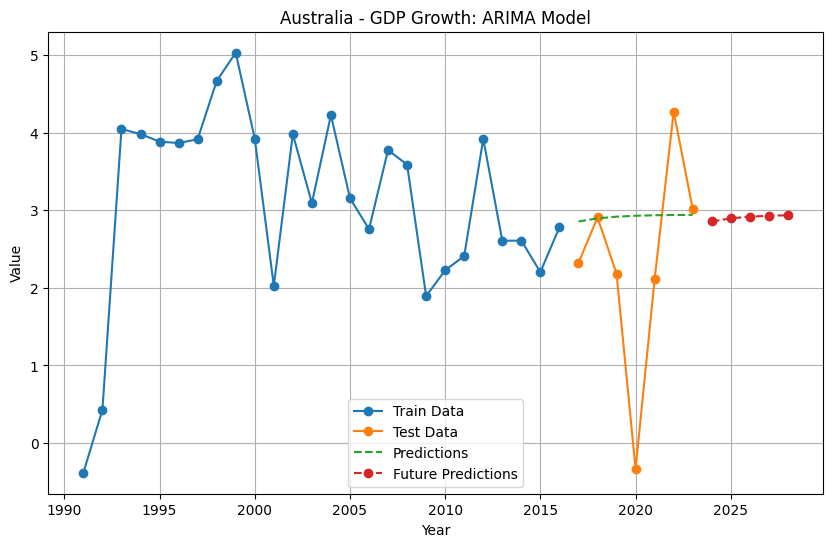

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=112.657, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.628, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=111.702, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=120.520, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=113.125, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=114.074, Time=0.80 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.371, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=109.194, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=110.142, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=110.126, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.145, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=110.129, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=112.125, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.229 seconds

Canada - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for Canada - GDP Growth:
Mean Squared Error: 9.624118394610235
R-squared: -0.02143142268056919
Predictions for the next 5 years:
Year 2024: 2.0283973050868456
Year 2025: 2.221113855188845
Year 2026: 2.221113855188845
Year 2027: 2.221113855188845
Year 2028: 2.221113855188845
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


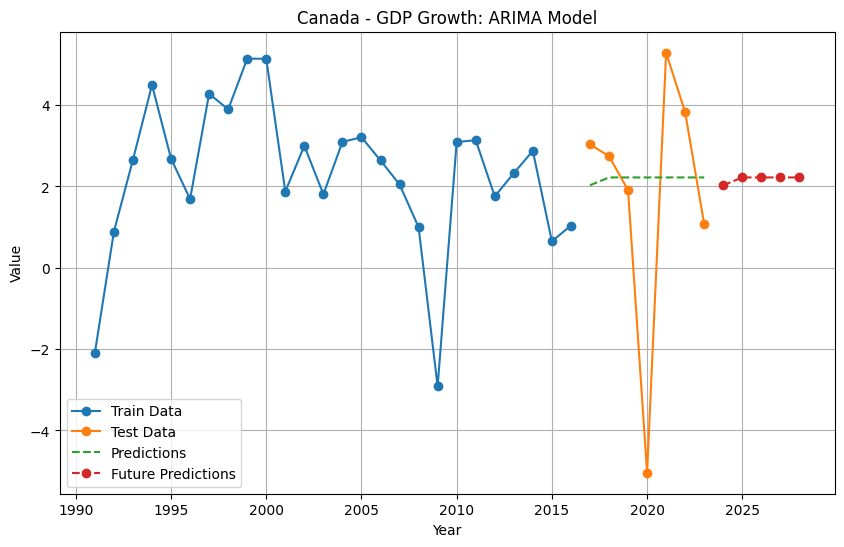

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=125.445, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.014, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=123.860, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=123.453, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=125.445, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=127.444, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.323 seconds

Germany - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for Germany - GDP Growth:
Mean Squared Error: 4.872763821511101
R-squared: -0.037645088032106644
Predictions for the next 5 years:
Year 2024: 0.685087329005342
Year 2025: 0.0
Year 2026: 0.0
Year 2027: 0.0
Year 2028: 0.0
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


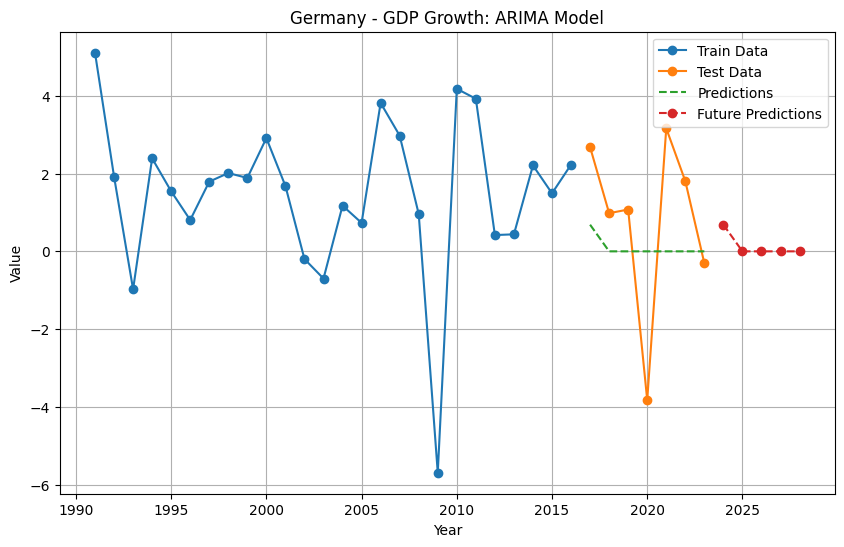

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=98.755, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113.464, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=99.775, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=104.542, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=99.897, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=99.350, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=104.519, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=101.345, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=101.240, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=95.566, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=93.597, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=94.287, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=95.560, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.130, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=97.559, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.702 seconds

France - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for France - GDP Growth:
Mean Squared Error: 15.547010942528471
R-squared: -0.01092047094053794
Predictions for the next 5 years:
Year 2024: 1.4109503440667837
Year 2025: 1.525801639528886
Year 2026: 1.525801639528886
Year 2027: 1.525801639528886
Year 2028: 1.525801639528886
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


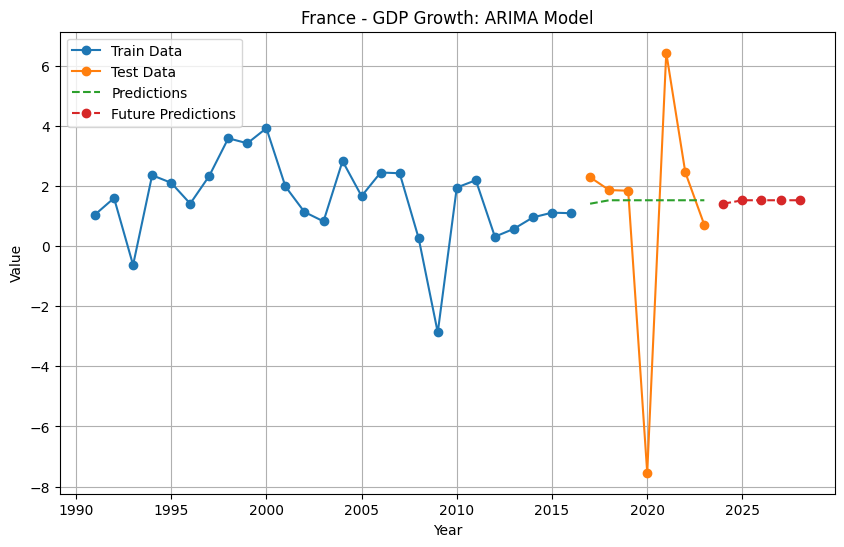

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=111.916, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.454, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=111.319, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=118.478, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=112.605, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=107.752, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=109.388, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=109.717, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=109.659, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.723, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=109.685, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=111.564, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.620 seconds

United Kingdom - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for United Kingdom - GDP Growth:
Mean Squared Error: 29.64084831670946
R-squared: -0.02233833866528845
Predictions for the next 5 years:
Year 2024: 2.022013337728649
Year 2025: 2.0148305010395426
Year 2026: 2.0148305010395426
Year 2027: 2.0148305010395426
Year 2028: 2.0148305010395426
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


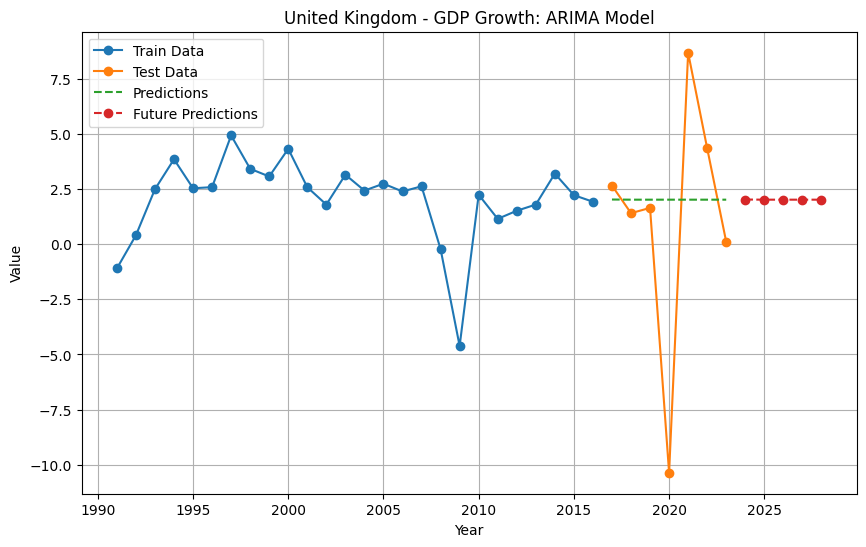

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=109.743, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111.010, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=109.238, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=107.805, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=109.746, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=111.102, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.752, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=109.511, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=109.435, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=109.394, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.244, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.146 seconds

Italy - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for Italy - GDP Growth:
Mean Squared Error: 23.274723191673484
R-squared: -0.0022948801398388063
Predictions for the next 5 years:
Year 2024: 0.950535065003582
Year 2025: 0.7145807446578141
Year 2026: 0.7145807446578141
Year 2027: 0.7145807446578141
Year 2028: 0.7145807446578141
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


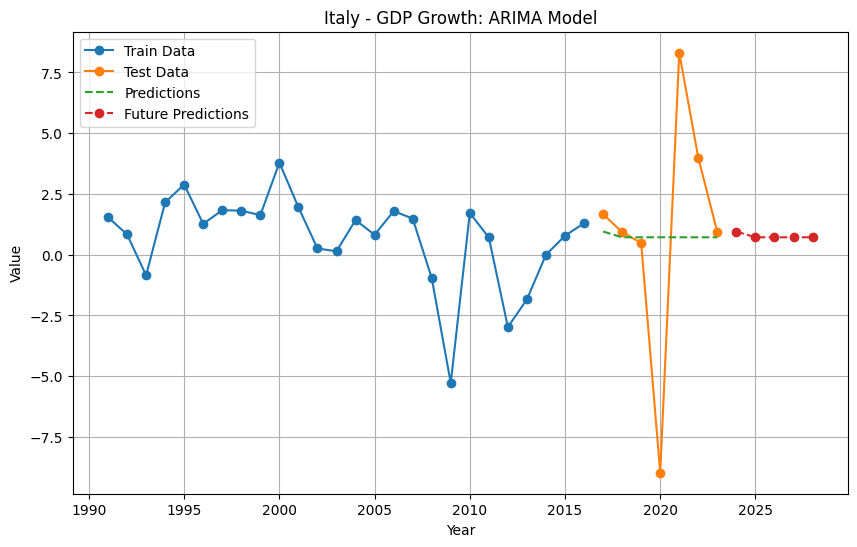

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=117.985, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.672, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=116.224, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=116.199, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.657, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.535, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.424, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.938 seconds

Japan - GDP Growth: Optimal ARIMA Model: (0, 0, 0)

Results for Japan - GDP Growth:
Mean Squared Error: 4.576446089270357
R-squared: -0.05824410105496214
Predictions for the next 5 years:
Year 2024: 0.9599551133564316
Year 2025: 0.9599551133564316
Year 2026: 0.9599551133564316
Year 2027: 0.9599551133564316
Year 2028: 0.9599551133564316
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


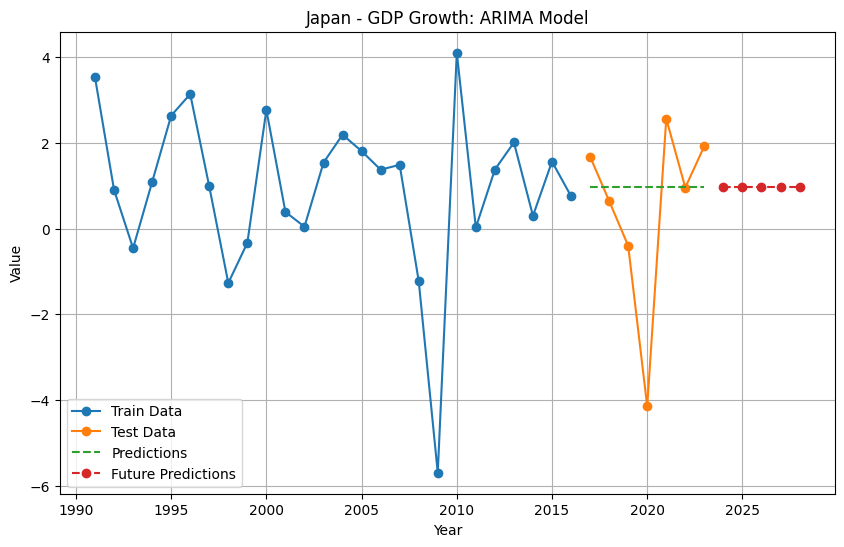

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=110.533, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.642, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=108.650, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=115.682, Time=0.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=110.617, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=112.394, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.099, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.239, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=106.646, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=106.245, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.528, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=106.285, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=108.149, Time=0.40 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.487 seconds

Netherlands - GDP Growth: Optimal ARIMA Model: (0, 0, 1)

Results for Netherlands - GDP Growth:
Mean Squared Error: 8.860754346923082
R-squared: 0.0020523671428703816


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Predictions for the next 5 years:
Year 2024: 2.135079243376282
Year 2025: 2.046701730312558
Year 2026: 2.046701730312558
Year 2027: 2.046701730312558
Year 2028: 2.046701730312558
----------------------------------------


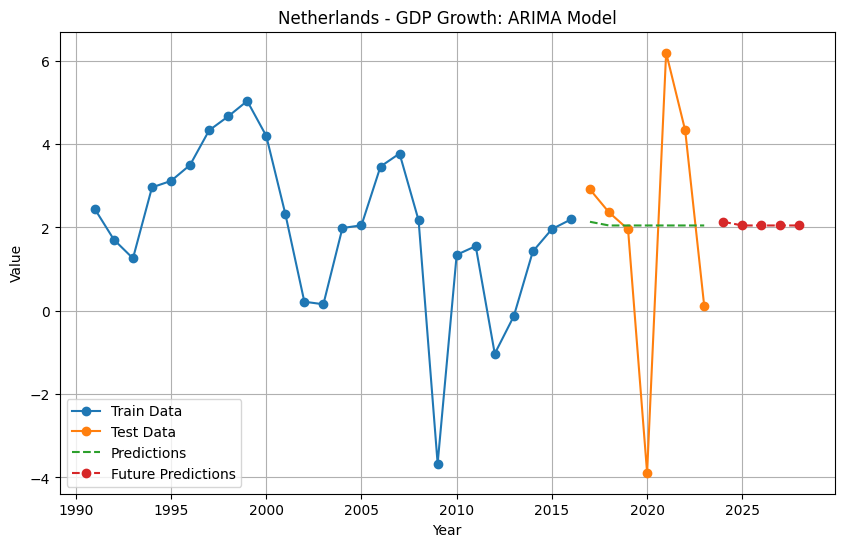

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=130.000, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.567, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=129.985, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=131.385, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=131.945, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=133.845, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.305, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.263, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=124.550, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=126.259, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.411 seconds

Sweden - GDP Growth: Optimal ARIMA Model: (0, 0, 0)

Results for Sweden - GDP Growth:
Mean Squared Error: 5.831655743552133
R-squared: -0.020065093835659686
Predictions for the next 5 years:
Year 2024: 2.1884020652424145
Year 2025: 2.1884020652424145
Year 2026: 2.1884020652424145
Year 2027: 2.1884020652424145
Year 2028: 2.1884020652424145
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


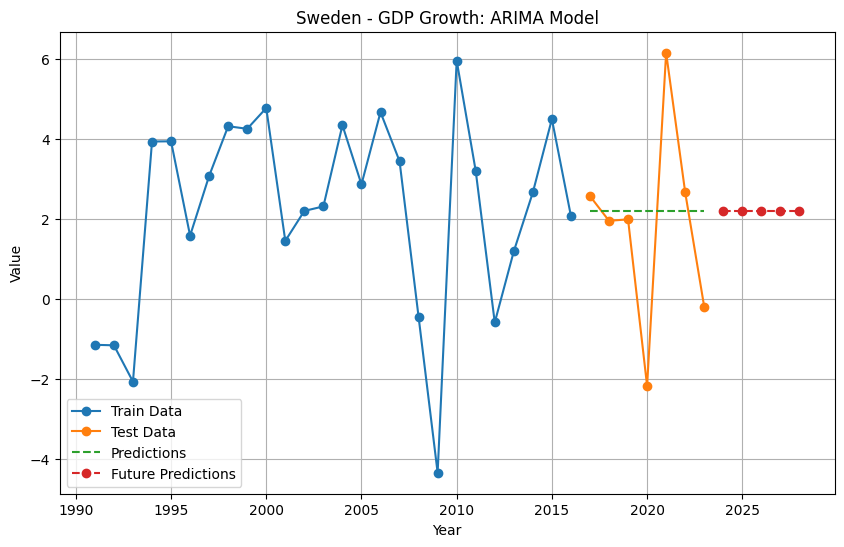

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=105.452, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.675, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=104.566, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=119.527, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=105.535, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=107.481, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=99.853, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.318, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=101.836, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=101.844, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=100.920, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.592 seconds

United States - GDP Growth: Optimal ARIMA Model: (1, 0, 0)

Results for United States - GDP Growth:
Mean Squared Error: 4.794462844982489
R-squared: -0.007583853511309968
Predictions for the next 5 years:
Year 2024: 2.1804760635802065
Year 2025: 2.32951729917591
Year 2026: 2.3910457673044507
Year 2027: 2.416446471848489
Year 2028: 2.426932606331565
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


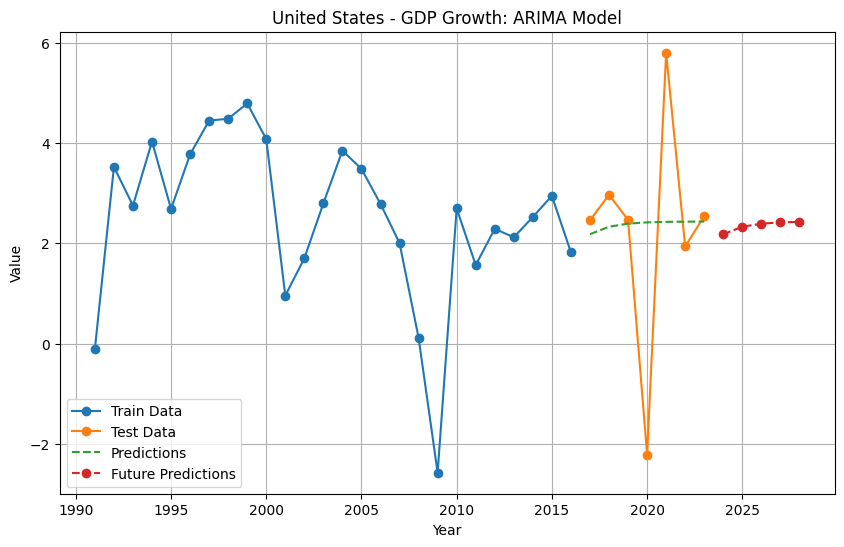

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.366, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=96.318, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=113.277, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=97.197, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85.527, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=84.537, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=85.134, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=87.076, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.579 seconds

Australia - Inflation: Optimal ARIMA Model: (0, 0, 0)

Results for Australia - Inflation:
Mean Squared Error: 4.377807129781951
R-squared: -0.07461509239067632
Predictions for the next 5 years:
Year 2024: 2.501914598451535
Year 2025: 2.501914598451535
Year 2026: 2.501914598451535
Year 2027: 2.501914598451535
Year 2028: 2.501914598451535
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


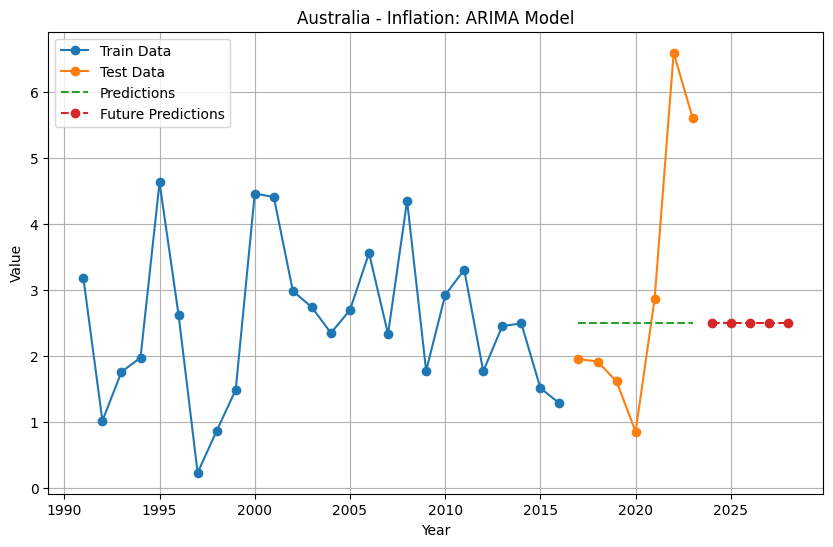

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=85.284, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.972, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=90.456, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=106.654, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=87.281, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=87.281, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=99.558, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=88.725, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=88.626, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=80.937, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79.689, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=77.737, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79.695, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.009 seconds

Canada - Inflation: Optimal ARIMA Model: (0, 0, 0)

Results for Canada - Inflation:
Mean Squared Error: 4.500729560065518
R-squared: -0.3024795287843347
Predictions for the next 5 years:
Year 2024: 1.921693130761468
Year 2025: 1.921693130761468
Year 2026: 1.921693130761468
Year 2027: 1.921693130761468
Year 2028: 1.921693130761468
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

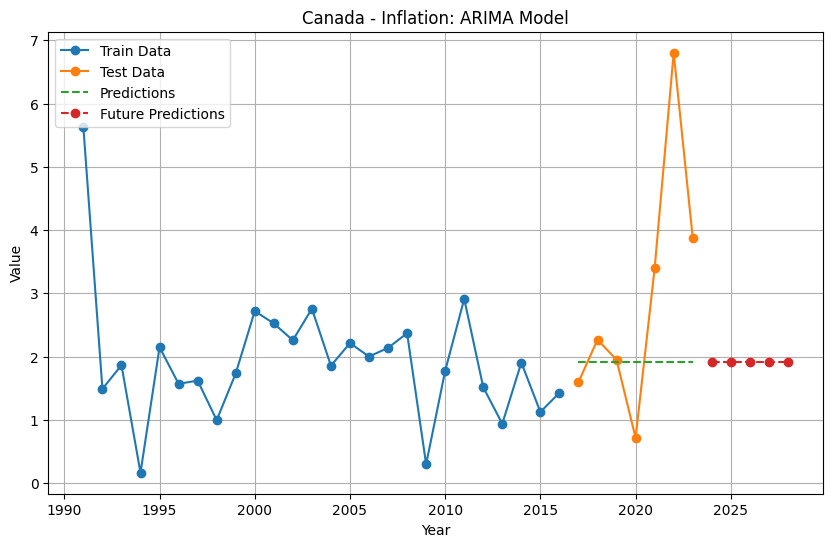

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=70.412, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.844, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=69.721, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=92.667, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=71.410, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=71.736, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68.515, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=85.540, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=68.303, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=68.708, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=69.038, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=67.050, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=70.118, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=68.807, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=66.837, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=68.819, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=70.581, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=80.628, Time=0.02 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.045 seconds

Germany - Inflation: Optimal ARIMA Model: (0, 0, 2)

Results for Germany - Inflation:
Mean Squared Error: 6.7504809432572035
R-squared: -0.2412853698576196
Predictions for the next 5 years:
Year 2024: 1.0952036879802152
Year 2025: 1.5904778392356624
Year 2026: 1.8196822741617398
Year 2027: 1.8196822741617398
Year 2028: 1.8196822741617398
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


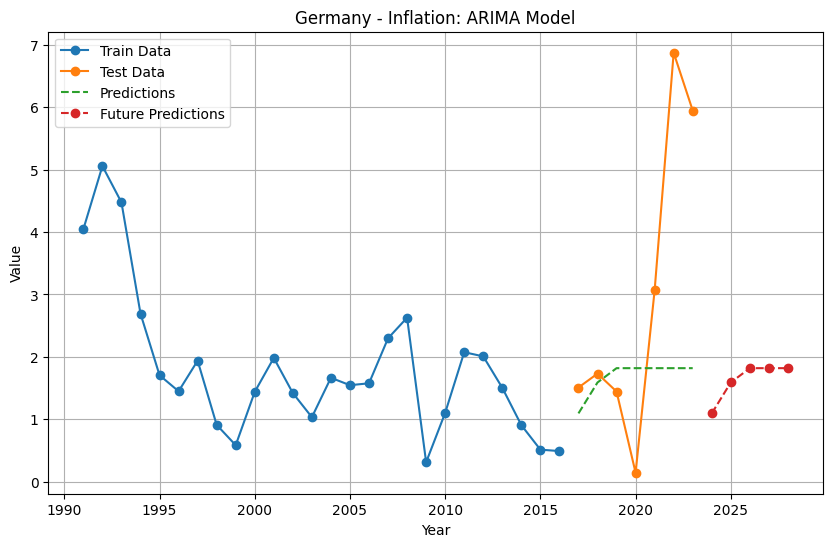

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=66.629, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=104.424, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=68.096, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=90.722, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=68.587, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=68.593, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=82.516, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=67.379, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=70.390, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=65.298, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.856, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=66.341, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=65.271, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=63.451, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=65.254, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=66.861, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.821 seconds

France - Inflation: Optimal ARIMA Model: (1, 0, 0)

Results for France - Inflation:
Mean Squared Error: 3.7495252548019518
R-squared: -0.18371089438129107
Predictions for the next 5 years:
Year 2024: 0.9031866728802661
Year 2025: 1.243354880397408
Year 2026: 1.4041024224826146
Year 2027: 1.480064172332895
Year 2028: 1.51596013295205
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


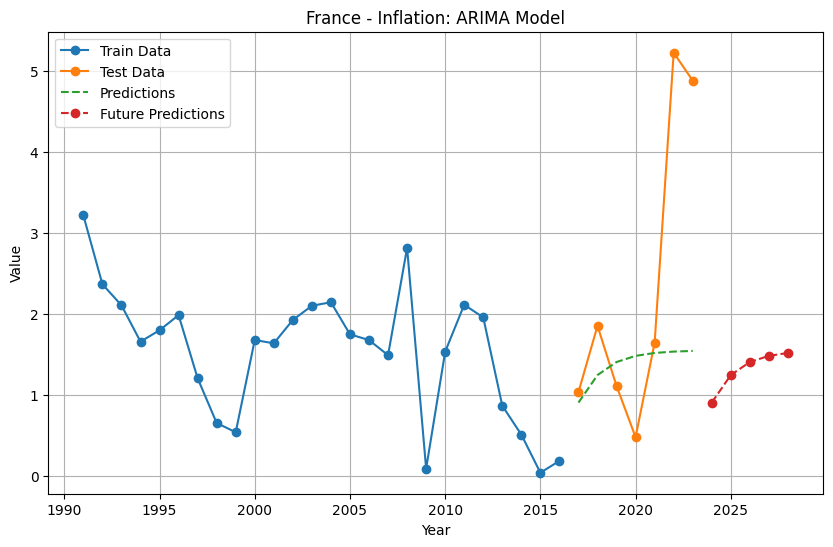

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=80.689, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=127.946, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=79.959, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=81.064, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79.960, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.417 seconds

United Kingdom - Inflation: Optimal ARIMA Model: (1, 0, 0)

Results for United Kingdom - Inflation:
Mean Squared Error: 13.23551068408243
R-squared: -1.1493005087368728
Predictions for the next 5 years:
Year 2024: 0.9837619658335691
Year 2025: 0.9597093783010144
Year 2026: 0.9362448669363781
Year 2027: 0.9133540535120035
Year 2028: 0.8910229113421632
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


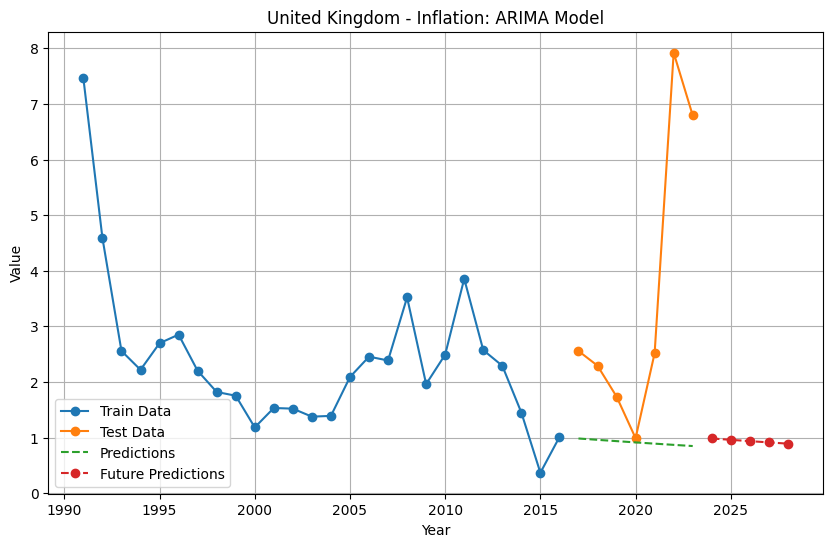

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=73.650, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.086, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74.202, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=73.291, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.299 seconds

Italy - Inflation: Optimal ARIMA Model: (0, 1, 0)

Results for Italy - Inflation:
Mean Squared Error: 15.588453852861177
R-squared: -0.9314831814927886
Predictions for the next 5 years:
Year 2024: -0.09401665691574998
Year 2025: -0.09401665691574998
Year 2026: -0.09401665691574998
Year 2027: -0.09401665691574998
Year 2028: -0.09401665691574998
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

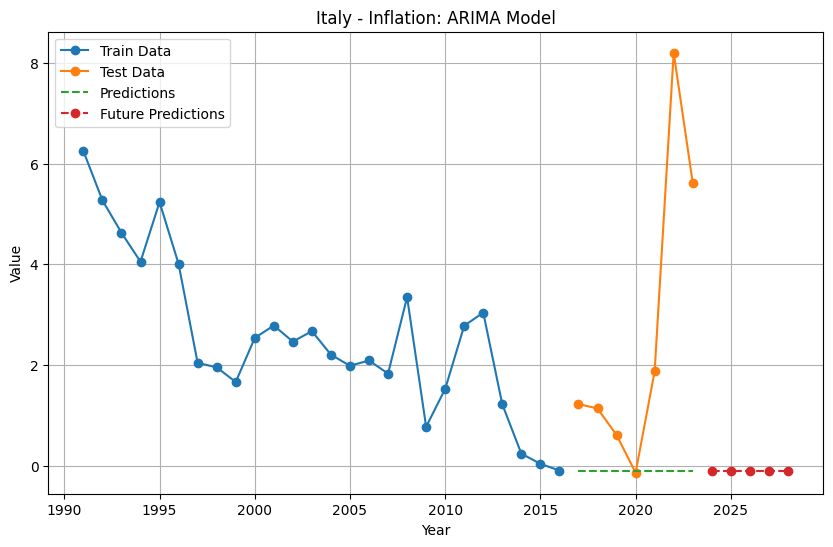

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=80.143, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82.858, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.155, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=79.584, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=80.142, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=82.135, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78.849, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.327 seconds

Japan - Inflation: Optimal ARIMA Model: (1, 0, 0)

Results for Japan - Inflation:
Mean Squared Error: 2.65832177113538
R-squared: -0.775797365489995
Predictions for the next 5 years:
Year 2024: -0.07056641031670474
Year 2025: -0.03912984032623731
Year 2026: -0.021697921108428112
Year 2027: -0.0120317327262869
Year 2028: -0.006671726368318905
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


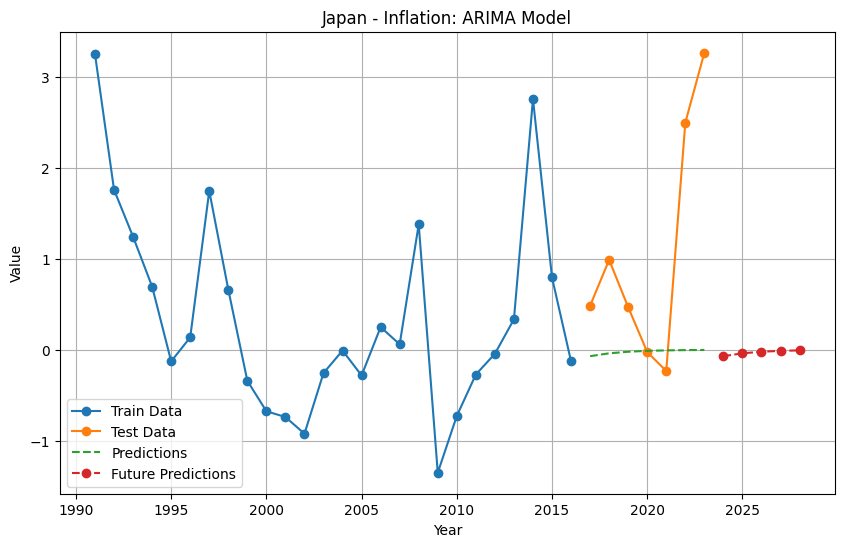

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=60.508, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62.445, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62.394, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59.077, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.377 seconds

Netherlands - Inflation: Optimal ARIMA Model: (0, 1, 0)

Results for Netherlands - Inflation:
Mean Squared Error: 17.29961367067957
R-squared: -1.1491471644375286
Predictions for the next 5 years:
Year 2024: 0.316666666666743
Year 2025: 0.316666666666743
Year 2026: 0.316666666666743
Year 2027: 0.316666666666743
Year 2028: 0.316666666666743
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

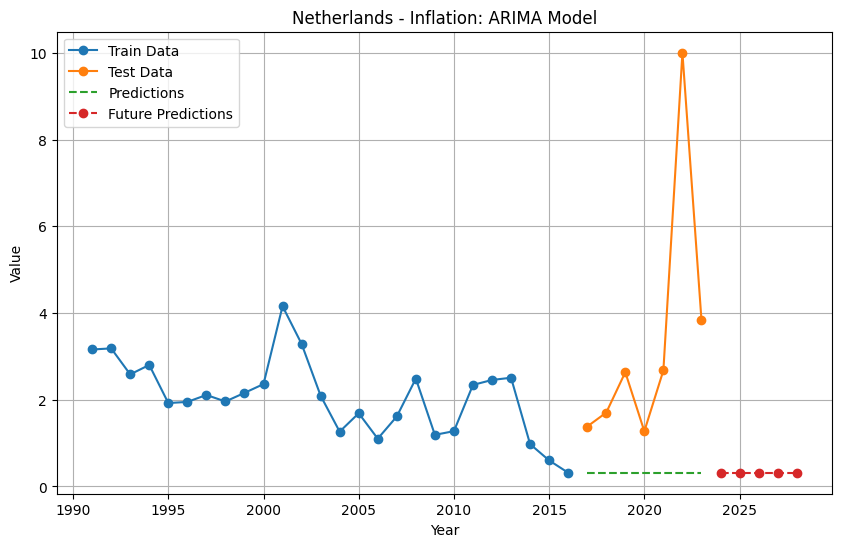

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=113.711, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=125.343, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=114.814, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=122.358, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=114.300, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=115.057, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=118.387, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=112.565, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=114.497, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=115.981, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=112.564, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113.009, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=114.127, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=113.762, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=113.798, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=115.722, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.987 seconds

Sweden - Inflation: Optimal ARIMA Model: (2, 0, 0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Sweden - Inflation:
Mean Squared Error: 13.217403422278254
R-squared: -0.3567721292757804
Predictions for the next 5 years:
Year 2024: 0.8622330415661665
Year 2025: 1.2758240702767103
Year 2026: 1.3398725176167845
Year 2027: 1.537769529797411
Year 2028: 1.6216338186166315
----------------------------------------


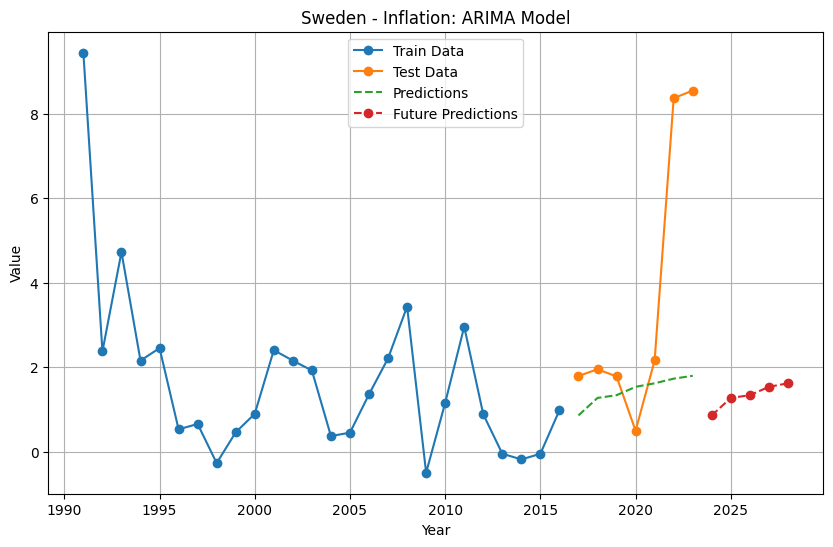

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84.891, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83.594, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83.128, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.444 seconds

United States - Inflation: Optimal ARIMA Model: (0, 1, 0)

Results for United States - Inflation:
Mean Squared Error: 9.693527552677946
R-squared: -1.0518905058996846
Predictions for the next 5 years:
Year 2024: 1.26158320570536
Year 2025: 1.26158320570536
Year 2026: 1.26158320570536
Year 2027: 1.26158320570536
Year 2028: 1.26158320570536
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


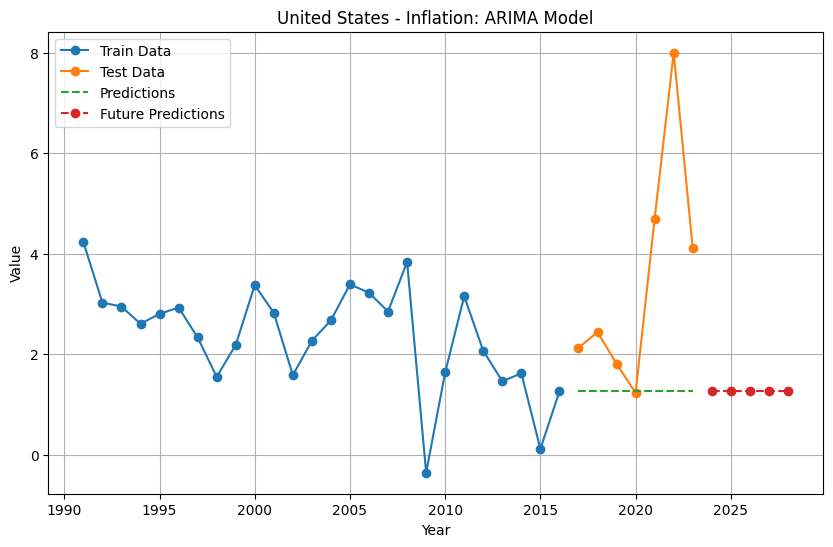

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=49.967, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48.623, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=49.326, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48.075, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48.288, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=49.729, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=51.472, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=46.882, Time=0.23 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=48.870, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=48.854, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=48.094, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=50.776, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.447 seconds

Australia - Unemployment: Optimal ARIMA Model: (0, 1, 1)

Results for Australia - Unemployment:
Mean Squared Error: 1.214912002501441
R-squared: -0.40257320609050895
Predictions for the next 5 years:
Year 2024: 5.5892308379122815
Year 2025: 5.5892308379122815
Year 2026: 5.5892308379122815
Year 2027: 5.5892308379122815
Year 2028: 5.5892308379122815
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


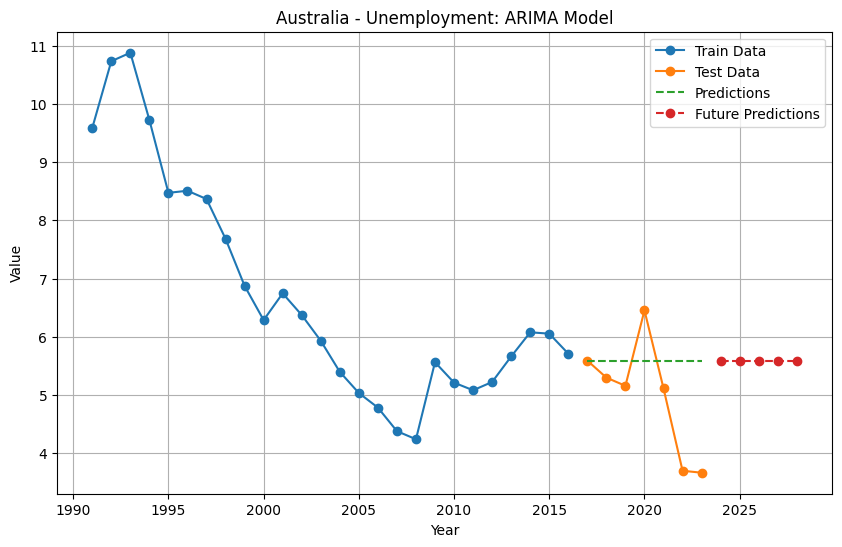

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54.440, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52.850, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=53.940, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52.992, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=51.869, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.385 seconds

Canada - Unemployment: Optimal ARIMA Model: (0, 1, 0)

Results for Canada - Unemployment:
Mean Squared Error: 2.374068428571429
R-squared: -0.11642528214343795
Predictions for the next 5 years:
Year 2024: 7.038
Year 2025: 7.038
Year 2026: 7.038
Year 2027: 7.038
Year 2028: 7.038
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


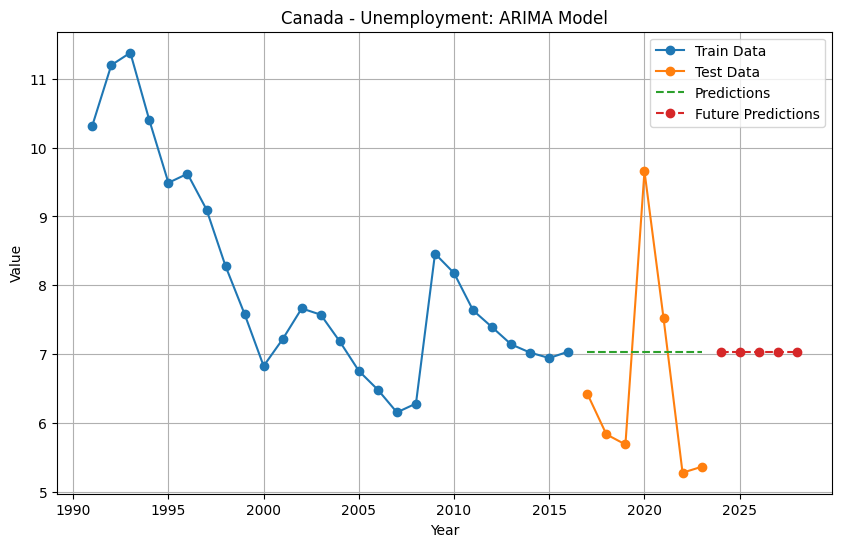

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=61.713, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=183.666, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=72.913, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=62.306, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=61.727, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=64.626, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60.823, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=72.169, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=60.554, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=62.080, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62.401, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=61.973, Time=0.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=60.023, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=61.992, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.474 seconds

Germany - Unemployment: Optimal ARIMA Model: (1, 0, 2)

Results for Germany - Unemployment:
Mean Squared Error: 3.531464985590432
R-squared: -37.16632890503448
Predictions for the next 5 years:
Year 2024: 4.007620133757943
Year 2025: 4.350180245595046
Year 2026: 4.8284791418182005
Year 2027: 5.212435357672353
Year 2028: 5.520657636371193
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


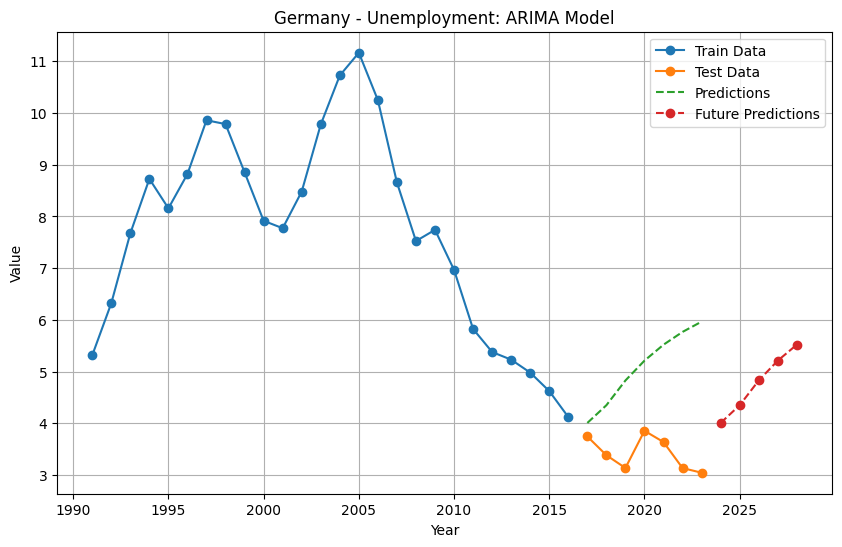

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=71.923, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=196.076, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=72.879, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=73.917, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=74.791, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.720, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=76.322, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=66.800, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=68.579, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=97.862, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=74.140, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=66.163, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=67.583, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=65.220, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=67.725, Time=0.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69.812, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=68.008, Time=0.26 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=66.638, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=74.715, Time=0.10 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 3.550 seconds

France - Unemployment: Optimal ARIMA Model: (3, 0, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for France - Unemployment:
Mean Squared Error: 4.241975051280345
R-squared: -6.640511819772612
Predictions for the next 5 years:
Year 2024: 10.205178679008528
Year 2025: 10.271297019780873
Year 2026: 10.281726930241312
Year 2027: 10.237609855158242
Year 2028: 10.146893765241598
----------------------------------------


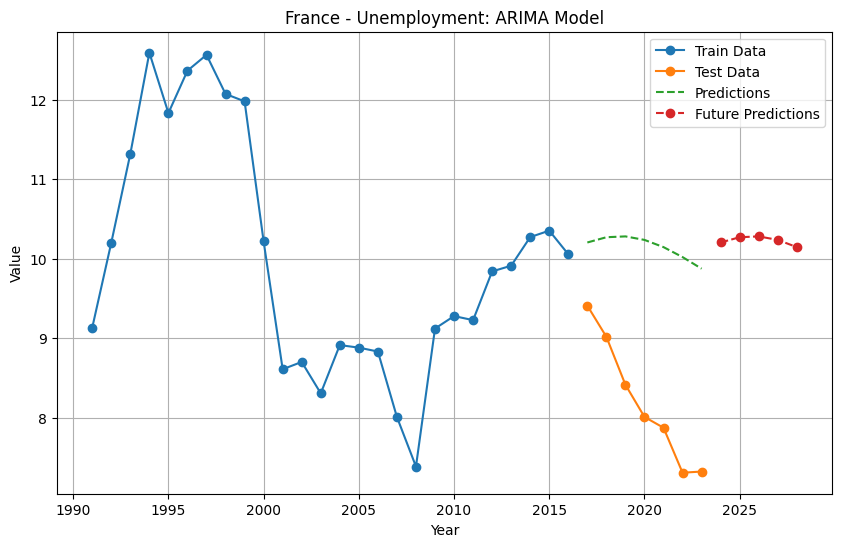

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=62.989, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=63.976, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=64.463, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=61.982, Time=0.04 sec

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 ARIMA(3,0,0)(0,0,0)[0]             : AIC=63.979, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=56.867, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=65.505, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=57.585, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=54.994, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60.501, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=56.937, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=62.833, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=61.361, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.181 seconds

United Kingdom - Unemployment: Optimal ARIMA Model: (2, 0, 1)

Results for United Kingdom - Unemployment:
Mean Squared Error: 2.460597339026635
R-squared: -16.730321255353928
Predictions for the next 5 years:
Year 2024: 4.5373159914184695
Year 2025: 4.518545319996292
Year 2026: 4.741518785172269
Year 2027: 5.162351653836145
Year 2028: 5.713163319379908
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


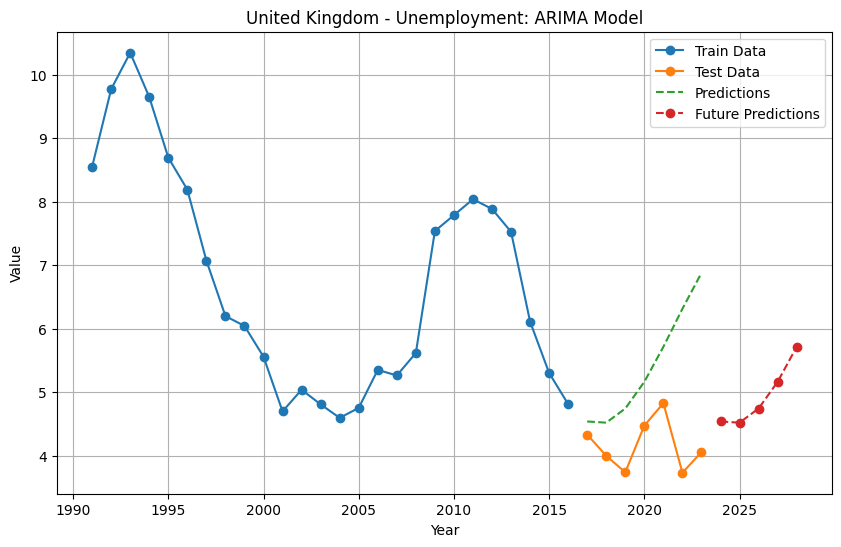

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=69.710, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.939, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=71.029, Time=0.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=70.770, Time=0.58 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.52 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=71.790, Time=1.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=65.664, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=70.956, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=65.560, Time=0.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=66.663, Time=0.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66.858, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=68.656, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=68.566, Time=0.30 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 6.708 seconds

Italy - Unemployment: Optimal ARIMA Model: (1, 0, 2)

Results for Italy - Unemployment:
Mean Squared Error: 2.6095591048122477
R-squared: -0.8183279997100221
Predictions for the next 5 years:
Year 2024: 11.475231559945069
Year 2025: 11.261711137550693
Year 2026: 10.93719339233376
Year 2027: 10.71279493446334
Year 2028: 10.557627247528492
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


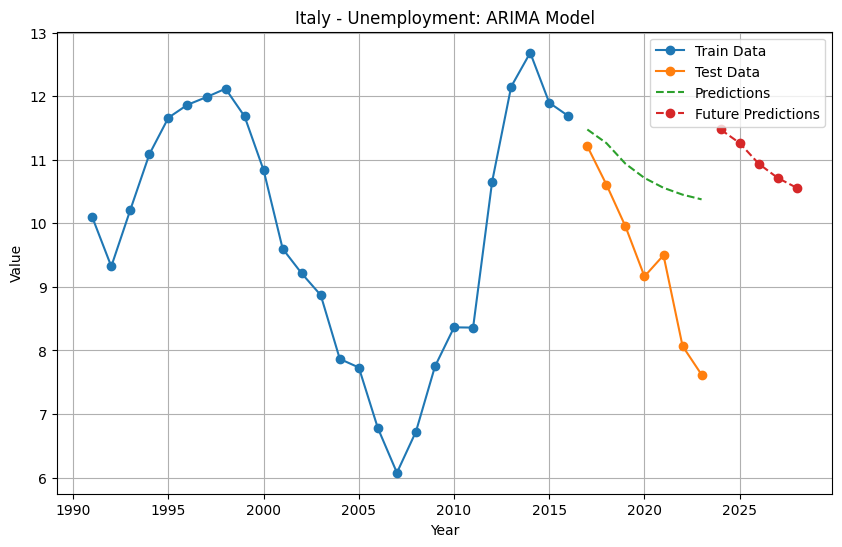

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=25.626, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.855, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=27.622, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=27.622, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29.419, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29.624, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=24.163, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32.406, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26.088, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=26.095, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=73.939, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27.164, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28.095, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.639 seconds

Japan - Unemployment: Optimal ARIMA Model: (1, 0, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Japan - Unemployment:
Mean Squared Error: 0.2854328447859081
R-squared: -8.241923445369656
Predictions for the next 5 years:
Year 2024: 2.989821776503913
Year 2025: 3.0485970825079214
Year 2026: 3.0998099692779446
Year 2027: 3.1444334676420427
Year 2028: 3.1833154118525417
----------------------------------------


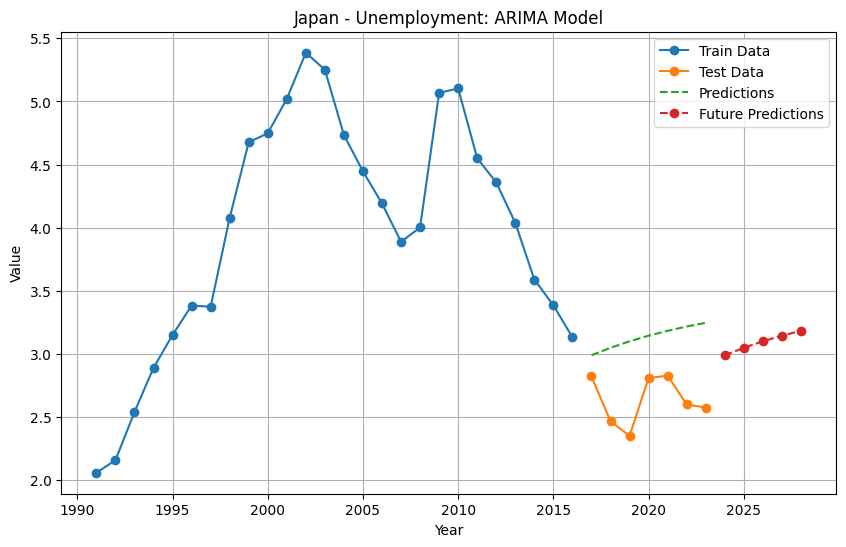

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=68.726, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=163.753, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70.158, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=69.576, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=70.949, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=71.472, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=65.078, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79.127, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=71.486, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=65.230, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=65.019, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=68.301, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=66.894, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66.855, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=66.166, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=67.506, Time=0.35 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 1.922 seconds

Netherlands - Unemployment: Optimal ARIMA Model: (1, 0, 2)

Results for Netherlands - Unemployment:
Mean Squared Error: 2.8088458112296553
R-squared: -11.993623036160038
Predictions for the next 5 years:
Year 2024: 5.517830004715155
Year 2025: 5.391155939206272
Year 2026: 5.453227514250052
Year 2027: 5.492359335662456
Year 2028: 5.517029234017253
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


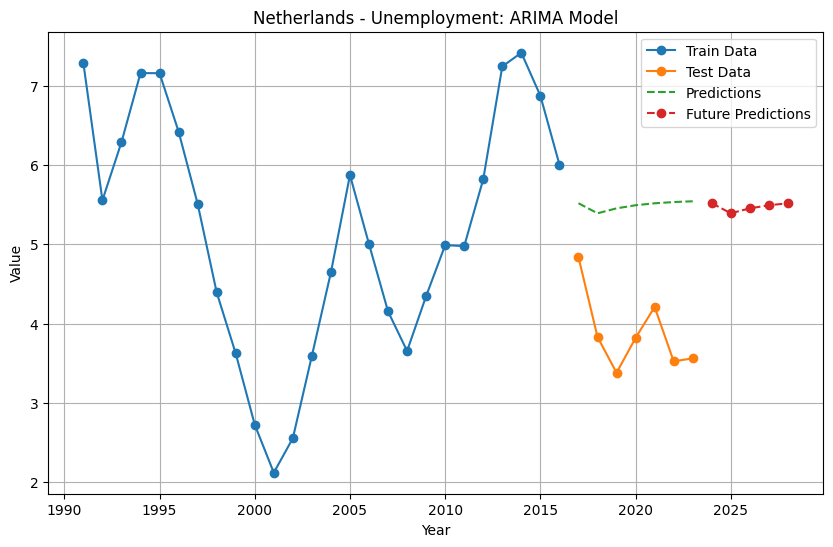

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=83.908, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=180.754, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=92.021, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=85.663, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=85.435, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=87.128, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=79.428, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=85.290, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=89.405, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=78.337, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=78.607, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=80.334, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=78.426, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=79.686, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=76.860, Time=0.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=76.882, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=82.086, Time=0.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=73.533, Time=0.35 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=76.913, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=75.353, Time=0.80 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=76.965, Time=1.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=75.824, Time=1.92 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=88.344, Time=0.36 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 7.979 seconds

Sweden - Unemployment: Optimal ARIMA Model: (4, 0, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Sweden - Unemployment:
Mean Squared Error: 1.6723730690873808
R-squared: -1.6409248028121497
Predictions for the next 5 years:
Year 2024: 6.475176930191406
Year 2025: 6.003173639501519
Year 2026: 5.835495265339587
Year 2027: 6.030681578608684
Year 2028: 6.442123972676727
----------------------------------------


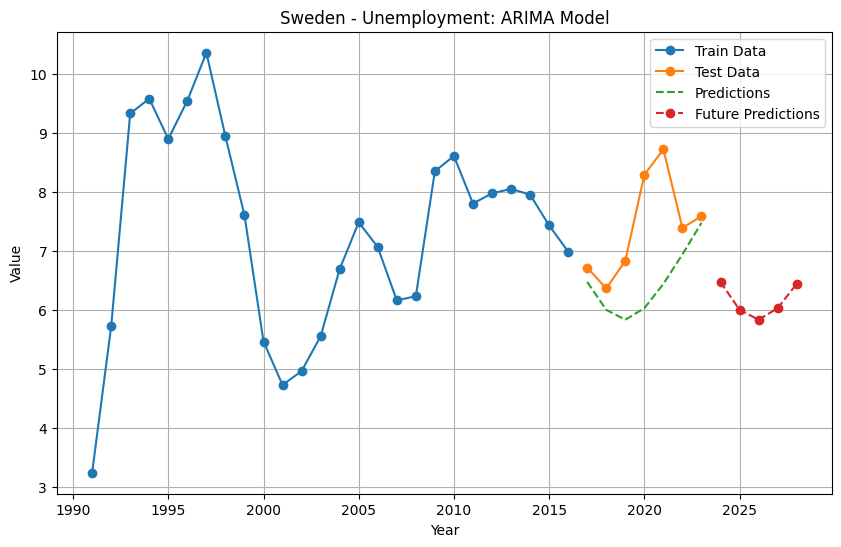

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=72.259, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=171.196, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.330, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=73.501, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=72.856, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=73.291, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=74.449, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=67.450, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79.122, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=74.756, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=65.507, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=63.740, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=65.557, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=67.497, Time=0.18 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.702 seconds

United States - Unemployment: Optimal ARIMA Model: (2, 0, 0)

Results for United States - Unemployment:
Mean Squared Error: 3.5914437467477063
R-squared: -0.5961151348555374
Predictions for the next 5 years:
Year 2024: 4.9576254745842965
Year 2025: 5.329574062240478
Year 2026: 5.762861926978016
Year 2027: 6.100511668902016
Year 2028: 6.274437585802567
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


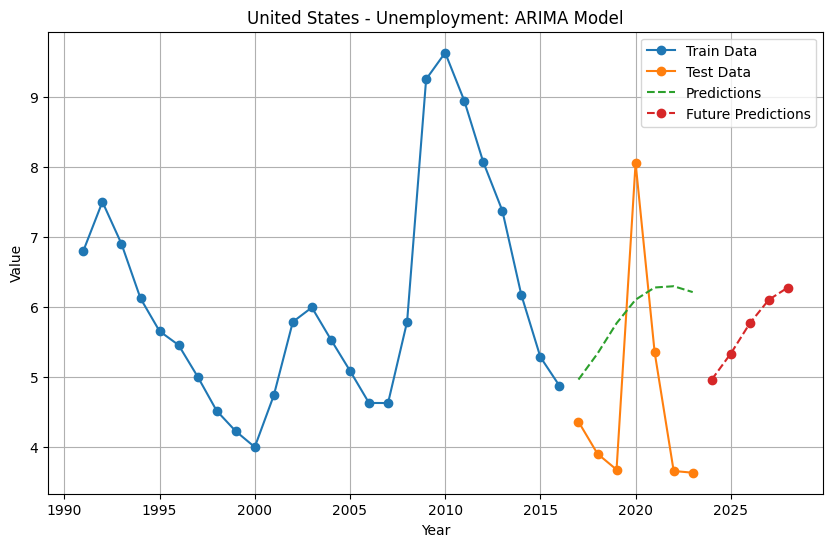

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=69.187, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66.879, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67.217, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67.633, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=64.882, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.208 seconds

Australia - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for Australia - Houseolld:
Mean Squared Error: 28.274787203408653
R-squared: -3.5532412731021044
Predictions for the next 5 years:
Year 2024: 56.9138291049203
Year 2025: 56.9138291049203
Year 2026: 56.9138291049203
Year 2027: 56.9138291049203
Year 2028: 56.9138291049203
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


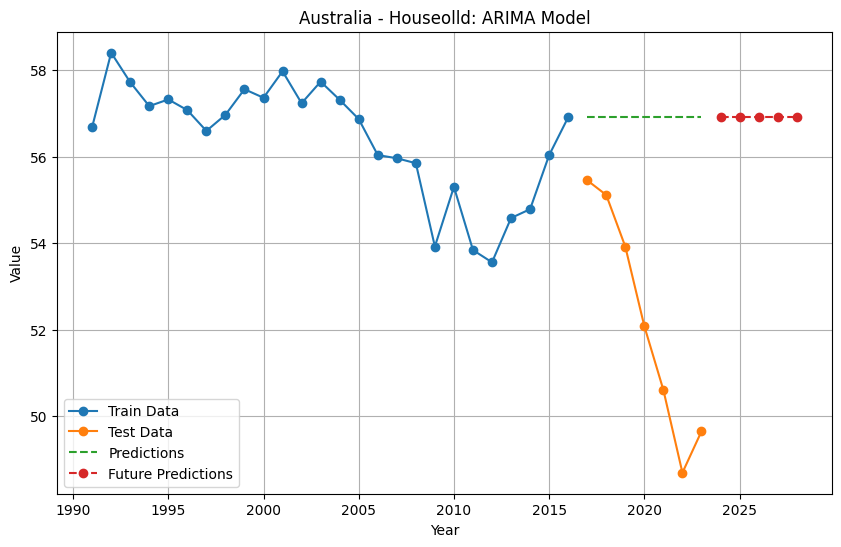

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=87.251, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=285.263, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=88.665, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=85.894, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=87.666, Time=0.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=89.187, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=77.268, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=75.242, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75.272, Time=0.02 sec

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=77.240, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=75.186, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75.560, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=77.521, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.381, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=75.907, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=79.155, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.992 seconds

Canada - Houseolld: Optimal ARIMA Model: (1, 0, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Canada - Houseolld:
Mean Squared Error: 2.140922688457046
R-squared: 0.23091334453804357
Predictions for the next 5 years:
Year 2024: 57.519440319416134
Year 2025: 56.787095566607846
Year 2026: 56.4856664229578
Year 2027: 56.361599815949035
Year 2028: 56.31053467079326
----------------------------------------


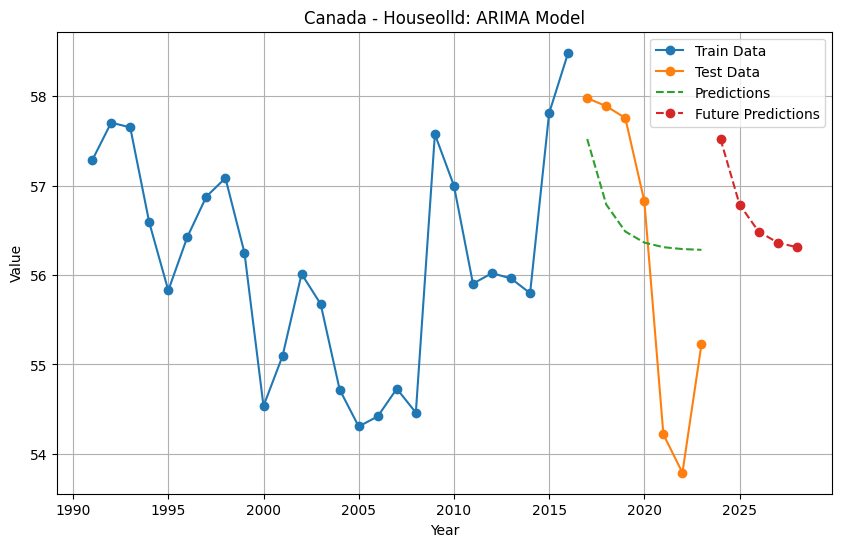

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62.410, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62.604, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=64.074, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=61.672, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=61.301, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.227 seconds

Germany - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for Germany - Houseolld:
Mean Squared Error: 3.807552571678273
R-squared: -2.9656537596552095
Predictions for the next 5 years:
Year 2024: 52.7544868154935
Year 2025: 52.7544868154935
Year 2026: 52.7544868154935
Year 2027: 52.7544868154935
Year 2028: 52.7544868154935
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


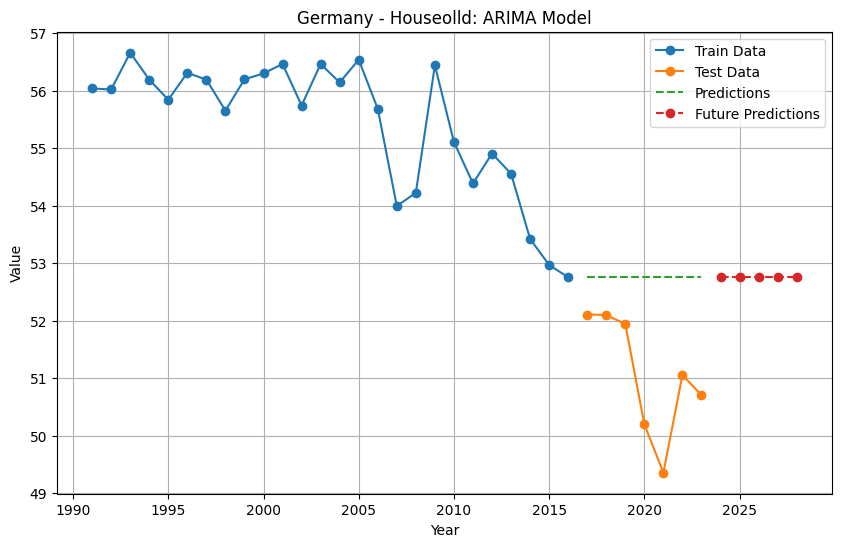

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=37.920, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283.702, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=39.886, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26.486, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=30.883, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24.805, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.778, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=26.381, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=28.643, Time=0.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.853 seconds

France - Houseolld: Optimal ARIMA Model: (1, 0, 0)

Results for France - Houseolld:
Mean Squared Error: 1.1562748462278603
R-squared: -4.783029435316602
Predictions for the next 5 years:
Year 2024: 54.33671285159848
Year 2025: 54.39030843320051
Year 2026: 54.429433371875916
Year 2027: 54.45799469690679
Year 2028: 54.4788445516321
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


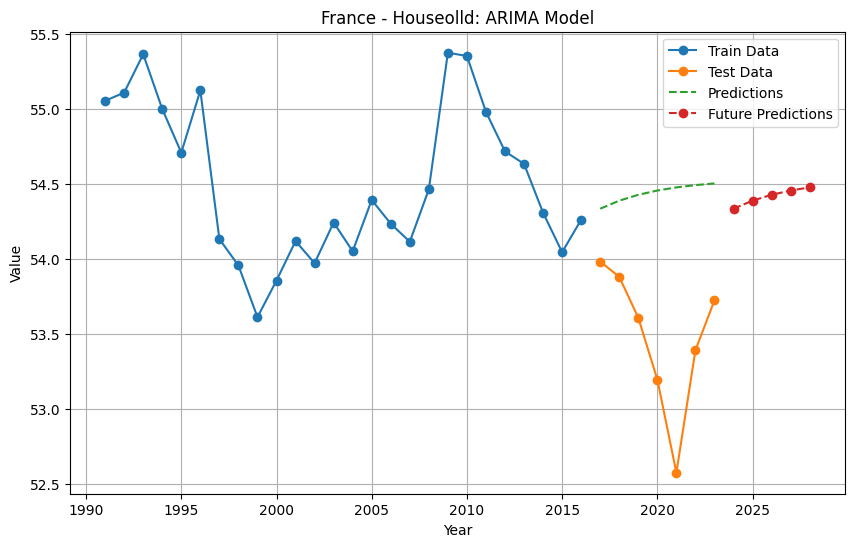

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84.722, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=86.705, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=86.664, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=82.871, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.408 seconds

United Kingdom - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for United Kingdom - Houseolld:
Mean Squared Error: 10.185134636522346
R-squared: -1.6198429312495972
Predictions for the next 5 years:
Year 2024: 64.74271268223
Year 2025: 64.74271268223
Year 2026: 64.74271268223
Year 2027: 64.74271268223
Year 2028: 64.74271268223
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

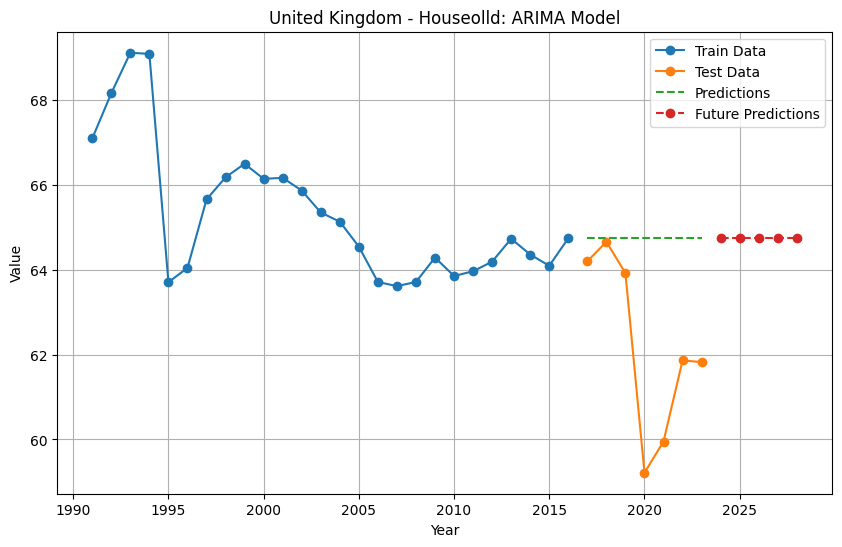

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41.112, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43.031, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43.014, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39.793, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.430 seconds

Italy - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for Italy - Houseolld:
Mean Squared Error: 2.4472838877596277
R-squared: -0.6680845817754633
Predictions for the next 5 years:
Year 2024: 60.1242267011395
Year 2025: 60.1242267011395
Year 2026: 60.1242267011395
Year 2027: 60.1242267011395
Year 2028: 60.1242267011395
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


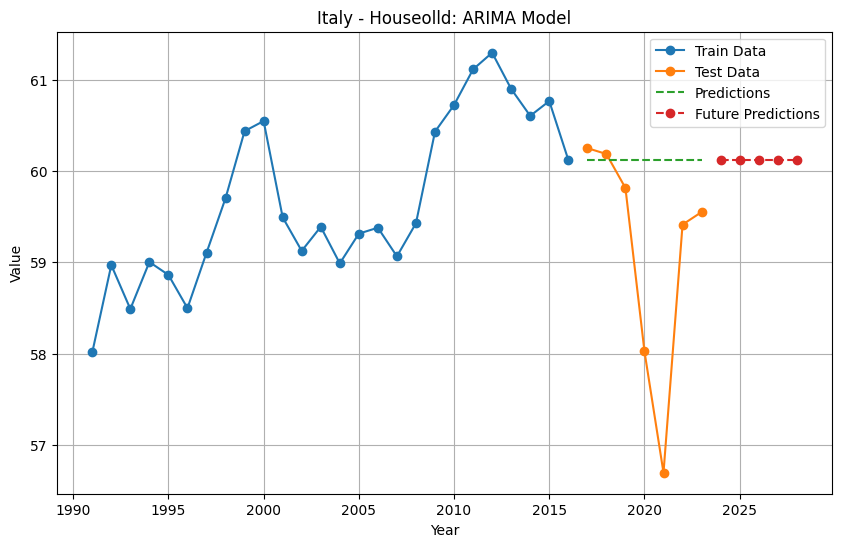

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63.225, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=61.763, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=61.838, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=61.353, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=61.245, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.389 seconds

Japan - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for Japan - Houseolld:
Mean Squared Error: 3.7286198482302133
R-squared: -0.0833598209114721
Predictions for the next 5 years:
Year 2024: 54.701499693404
Year 2025: 54.701499693404
Year 2026: 54.701499693404
Year 2027: 54.701499693404
Year 2028: 54.701499693404
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


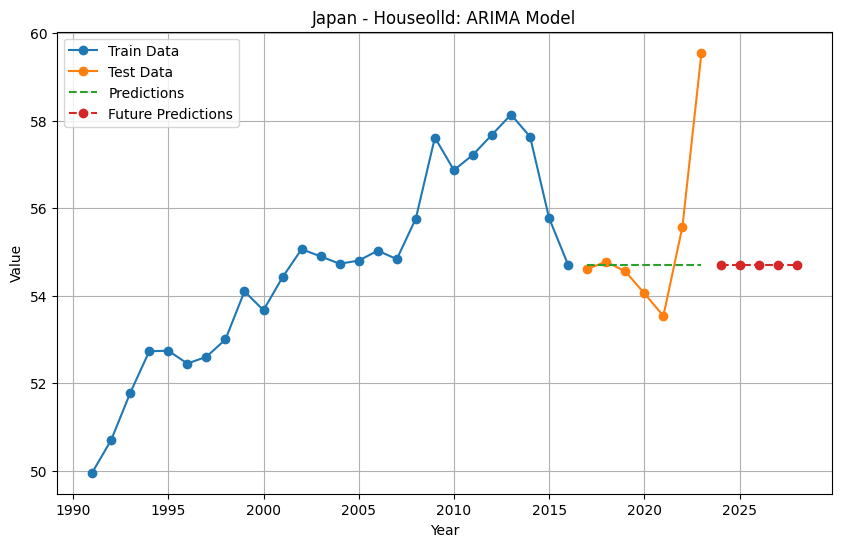

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39.548, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38.704, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=37.650, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37.984, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=40.899, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39.577, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=37.734, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.872 seconds

Netherlands - Houseolld: Optimal ARIMA Model: (1, 1, 0)

Results for Netherlands - Houseolld:
Mean Squared Error: 0.9847612302833321
R-squared: -0.043917349760990376
Predictions for the next 5 years:
Year 2024: 44.33388475231063
Year 2025: 44.098663005194716
Year 2026: 43.87952763358159
Year 2027: 43.665759240971745
Year 2028: 43.4537814607728
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


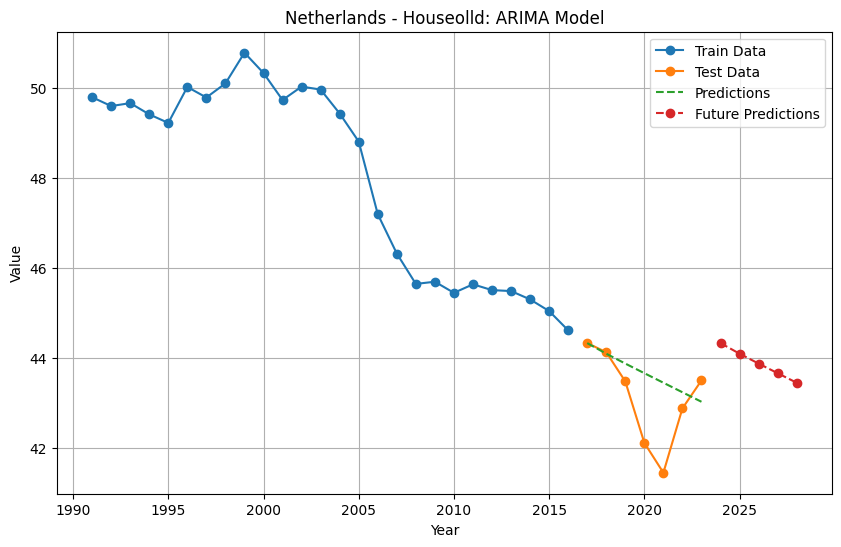

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62.783, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=64.782, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=64.778, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=61.538, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.071 seconds

Sweden - Houseolld: Optimal ARIMA Model: (0, 1, 0)

Results for Sweden - Houseolld:
Mean Squared Error: 2.8523825296138603
R-squared: -2.2810899302573695
Predictions for the next 5 years:
Year 2024: 45.8569147079602
Year 2025: 45.8569147079602
Year 2026: 45.8569147079602
Year 2027: 45.8569147079602
Year 2028: 45.8569147079602
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


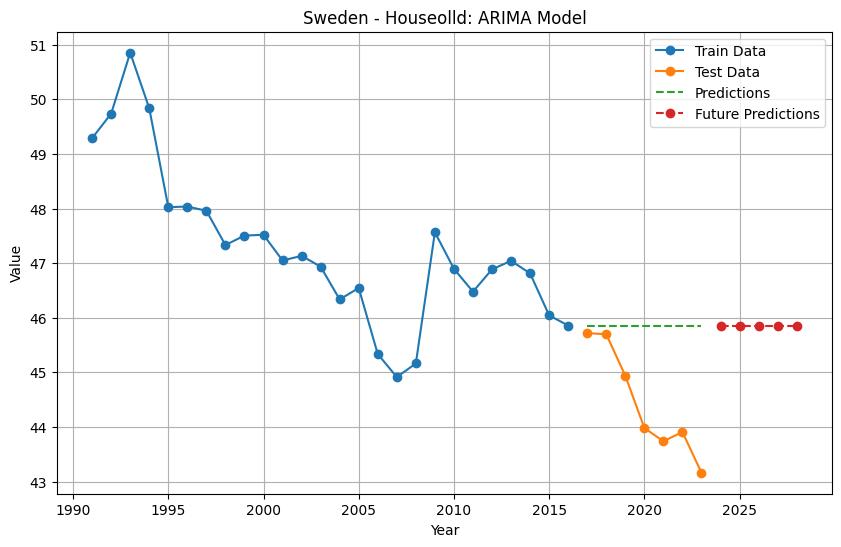

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27.733, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26.728, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.734, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.845, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28.135, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27.732, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27.411, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=25.636, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=27.590, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=27.607, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=26.051, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=29.583, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.090 seconds

United States - Houseolld: Optimal ARIMA Model: (1, 1, 0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Results for United States - Houseolld:
Mean Squared Error: 2.6057845820435928
R-squared: -0.6111866319018202
Predictions for the next 5 years:
Year 2024: 67.8687722822378
Year 2025: 67.9474700329282
Year 2026: 67.97998895063843
Year 2027: 67.99342618359321
Year 2028: 67.9989786202115
----------------------------------------


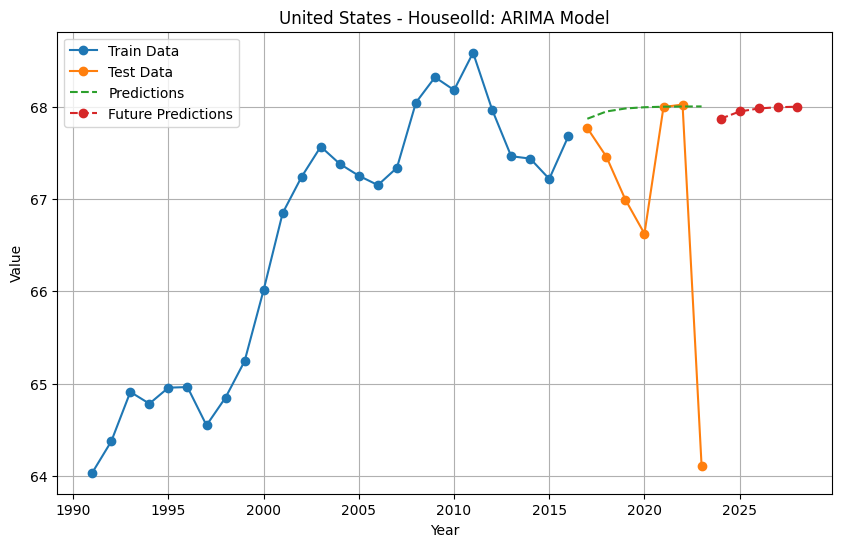

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=230.279, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=228.200, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=228.933, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=228.312, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=226.433, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.225 seconds

Australia - stock: Optimal ARIMA Model: (0, 1, 0)

Results for Australia - stock:
Mean Squared Error: 591.2239129539477
R-squared: -0.0926548377866494
Predictions for the next 5 years:
Year 2024: 65.8322066670933
Year 2025: 65.8322066670933
Year 2026: 65.8322066670933
Year 2027: 65.8322066670933
Year 2028: 65.8322066670933
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


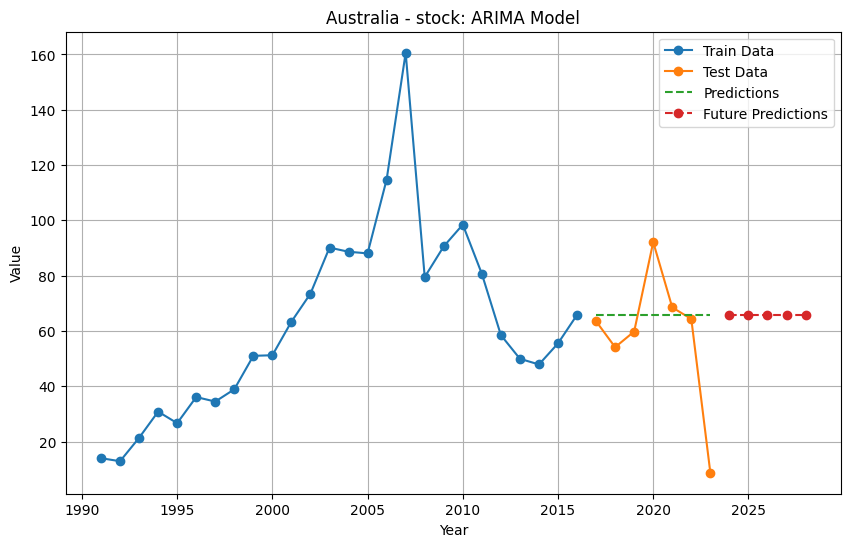

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=200.818, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=197.340, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=199.112, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=199.165, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=196.518, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.217 seconds

Canada - stock: Optimal ARIMA Model: (0, 1, 0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Canada - stock:
Mean Squared Error: 1181.9881471846675
R-squared: -0.04691538390442074
Predictions for the next 5 years:
Year 2024: 75.482371926819
Year 2025: 75.482371926819
Year 2026: 75.482371926819
Year 2027: 75.482371926819
Year 2028: 75.482371926819
----------------------------------------


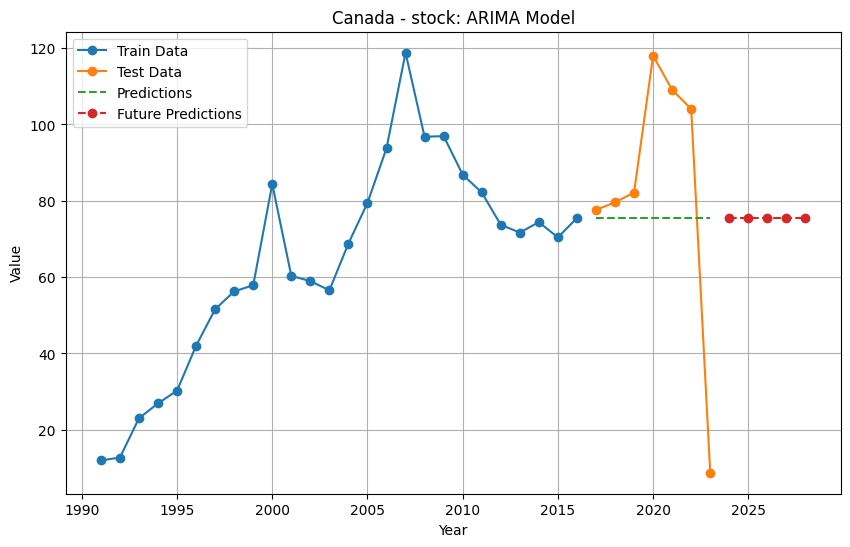

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=236.348, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=281.842, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=234.502, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.619, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=236.402, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=237.411, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=231.473, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=243.442, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=232.034, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=231.970, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=231.737, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=233.646, Time=0.24 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.954 seconds

Germany - stock: Optimal ARIMA Model: (1, 0, 0)

Results for Germany - stock:
Mean Squared Error: 217.13152021045462
R-squared: -0.6236387173864746
Predictions for the next 5 years:
Year 2024: 36.64048323249702
Year 2025: 39.382754472654
Year 2026: 41.154695690498244
Year 2027: 42.29965014778074
Year 2028: 43.03947192970527
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


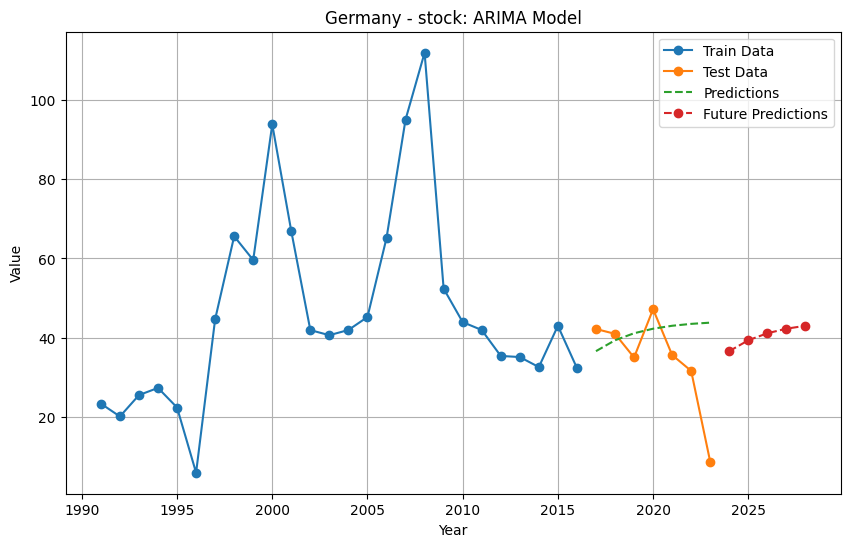

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=217.278, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=283.360, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=217.207, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=258.135, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=217.956, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=219.218, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=216.735, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=246.538, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=216.344, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=217.712, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=217.874, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=215.912, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=228.313, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=217.827, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=218.611, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=218.724, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.454 seconds

France - stock: Optimal ARIMA Model: (1, 0, 1)

Results for France - stock:
Mean Squared Error: 324.1152435487303
R-squared: -0.6824741190733075
Predictions for the next 5 years:
Year 2024: 48.788017179102525
Year 2025: 47.640942566439506
Year 2026: 46.77357084309075
Year 2027: 46.1176992039143
Year 2028: 45.62175542860281
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


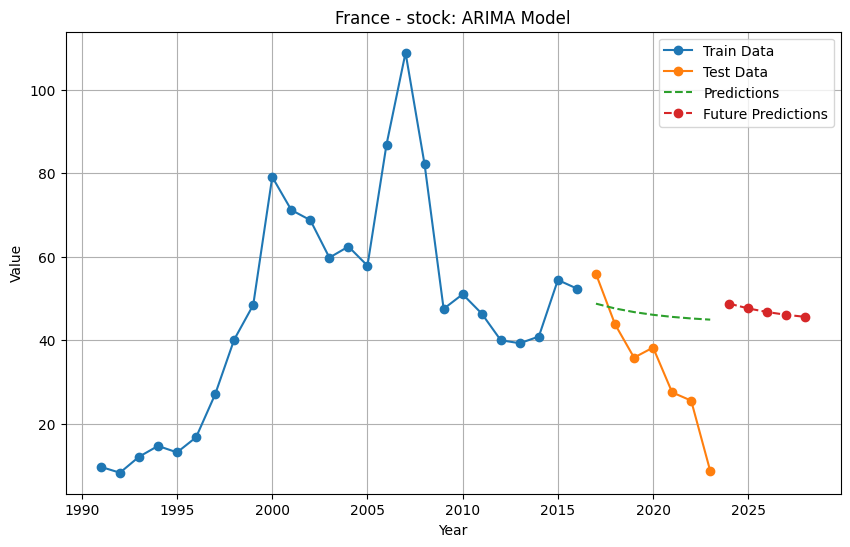

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=239.258, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.551, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=237.296, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=239.270, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=235.655, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=256.092, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=237.104, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=236.954, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=240.780, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=238.493, Time=0.28 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.265 seconds

United Kingdom - stock: Optimal ARIMA Model: (1, 0, 0)

Results for United Kingdom - stock:
Mean Squared Error: 1075.2290523831105
R-squared: -4.4908871547711415
Predictions for the next 5 years:
Year 2024: 55.57454118800699
Year 2025: 58.04820997598809
Year 2026: 59.97143216307063
Year 2027: 61.46669442245556
Year 2028: 62.629227404530056
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


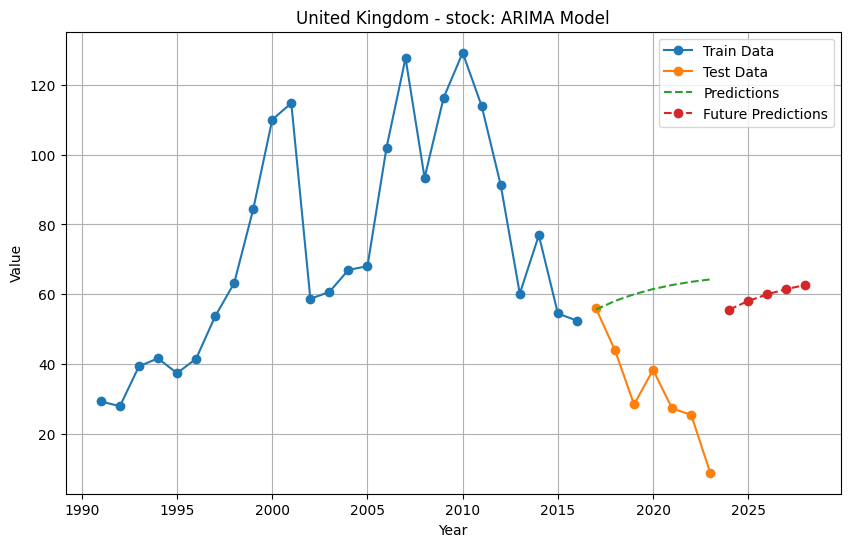

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=244.651, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=275.990, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=245.431, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=261.979, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=246.442, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=246.466, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=245.210, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=244.227, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=245.242, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=242.703, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=248.935, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=244.218, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=246.218, Time=0.16 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.226 seconds

Italy - stock: Optimal ARIMA Model: (1, 0, 0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for Italy - stock:
Mean Squared Error: 241.40260039534178
R-squared: -9.162656410075536
Predictions for the next 5 years:
Year 2024: 25.366822213519765
Year 2025: 30.349494195802876
Year 2026: 33.025513926598926
Year 2027: 34.46271100179722
Year 2028: 35.23457953818655
----------------------------------------


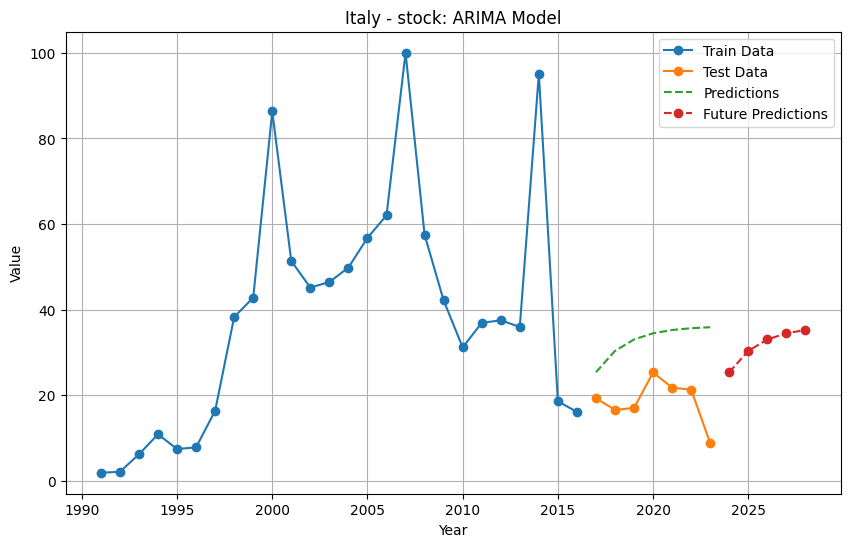

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=231.469, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=227.936, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=229.707, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=229.739, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=226.442, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.366 seconds

Japan - stock: Optimal ARIMA Model: (0, 1, 0)

Results for Japan - stock:
Mean Squared Error: 1681.1237525382353
R-squared: -0.0007556664197085894
Predictions for the next 5 years:
Year 2024: 104.527886021421
Year 2025: 104.527886021421
Year 2026: 104.527886021421
Year 2027: 104.527886021421
Year 2028: 104.527886021421
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


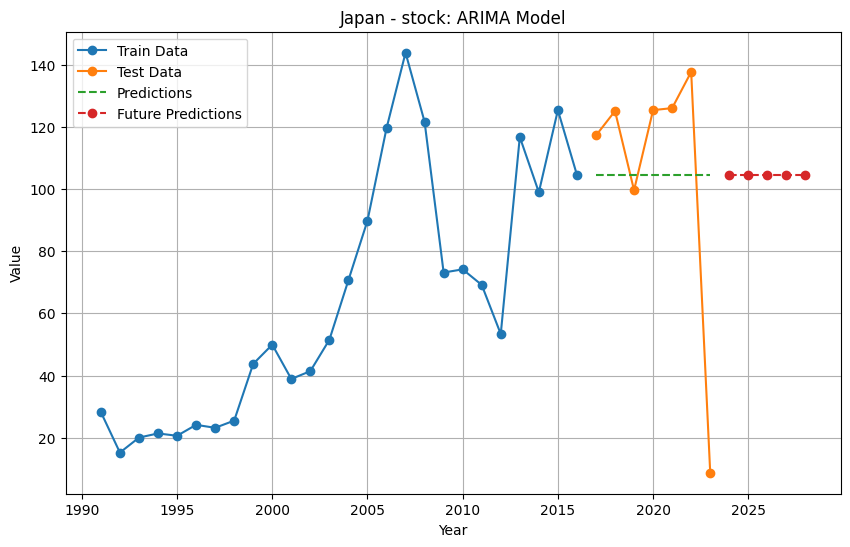

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=258.353, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=305.001, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=256.454, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=284.124, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=258.365, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=260.292, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=256.630, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.523 seconds

Netherlands - stock: Optimal ARIMA Model: (1, 0, 0)

Results for Netherlands - stock:
Mean Squared Error: 10.563637240423388
R-squared: -0.27569767297252157
Predictions for the next 5 years:
Year 2024: 0.33781129481878924
Year 2025: 0.3058809068654154
Year 2026: 0.27696862307401127
Year 2027: 0.250789168090397
Year 2028: 0.22708423117901913
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


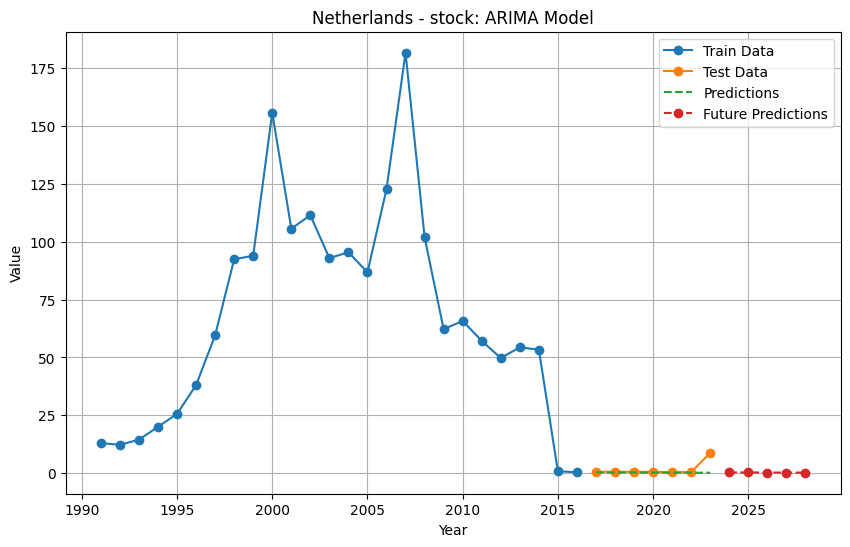

No data found for Sweden - stock. Skipping...
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=263.991, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=262.188, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=263.959, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=263.704, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=260.974, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.324 seconds

United States - stock: Optimal ARIMA Model: (0, 1, 0)

Results for United States - stock:
Mean Squared Error: 7761.151049450682
R-squared: -0.6597921127263864
Predictions for the next 5 years:
Year 2024: 223.725204152766
Year 2025: 223.725204152766
Year 2026: 223.725204152766
Year 2027: 223.725204152766
Year 2028: 223.725204152766
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


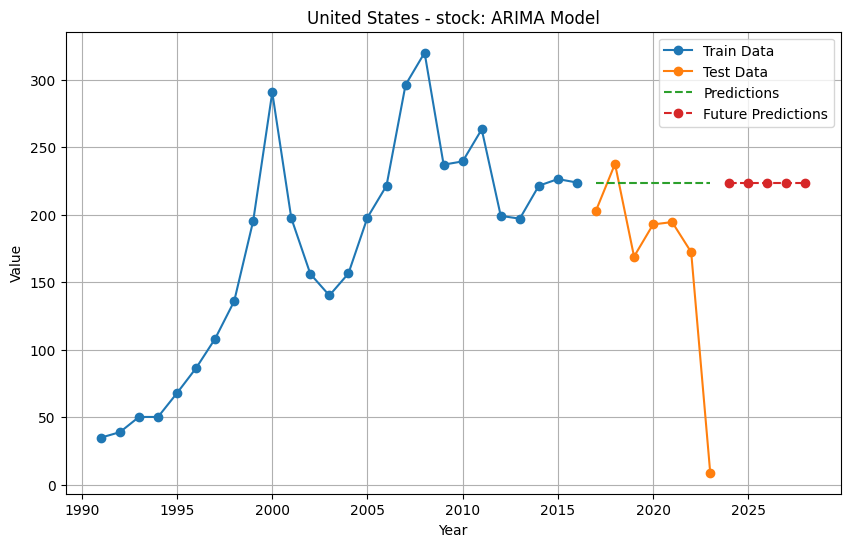

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=99.669, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=108.551, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=98.631, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=101.036, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106.715, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=98.697, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=99.883, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=97.182, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=97.669, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=98.451, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=99.804, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=98.764, Time=0.39 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.125 seconds

Australia - Real Interest rate: Optimal ARIMA Model: (1, 1, 0)

Results for Australia - Real Interest rate:
Mean Squared Error: 16.235354421311108
R-squared: -3.6170202487635716
Predictions for the next 5 years:
Year 2024: 6.188522867531003
Year 2025: 6.145574941402646
Year 2026: 6.171262575553295
Year 2027: 6.155898514753584
Year 2028: 6.165087931064672
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


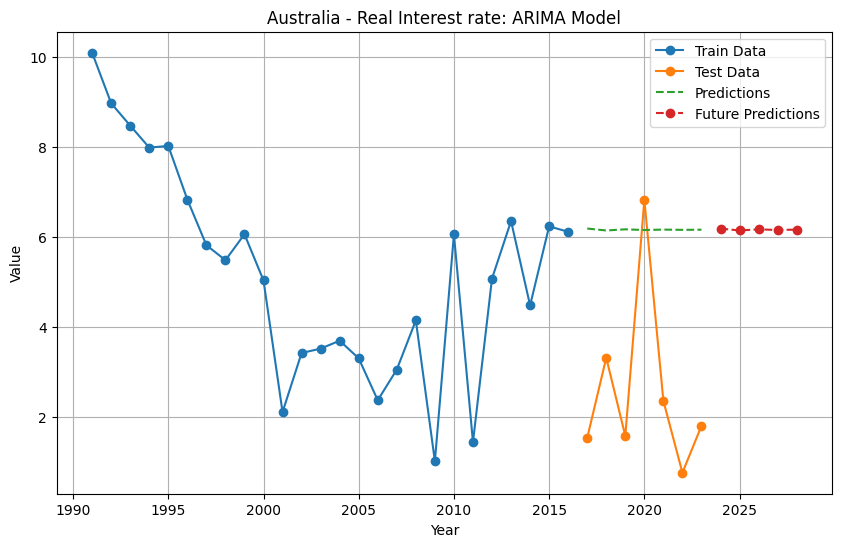

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=108.496, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=105.474, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=106.726, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=98.087, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=100.084, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=100.084, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=97.419, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=103.892, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=99.313, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=99.347, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=101.627, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=101.253, Time=0.05 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 3.347 seconds

Canada - Real Interest rate: Optimal ARIMA Model: (2, 1, 0)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Results for Canada - Real Interest rate:
Mean Squared Error: 22.42063496589868
R-squared: -0.03233758771159323
Predictions for the next 5 years:
Year 2024: 1.6335084423947213
Year 2025: 2.776371652544837
Year 2026: 2.22340594895307
Year 2027: 1.9579639419363488
Year 2028: 2.4292988241106626
----------------------------------------


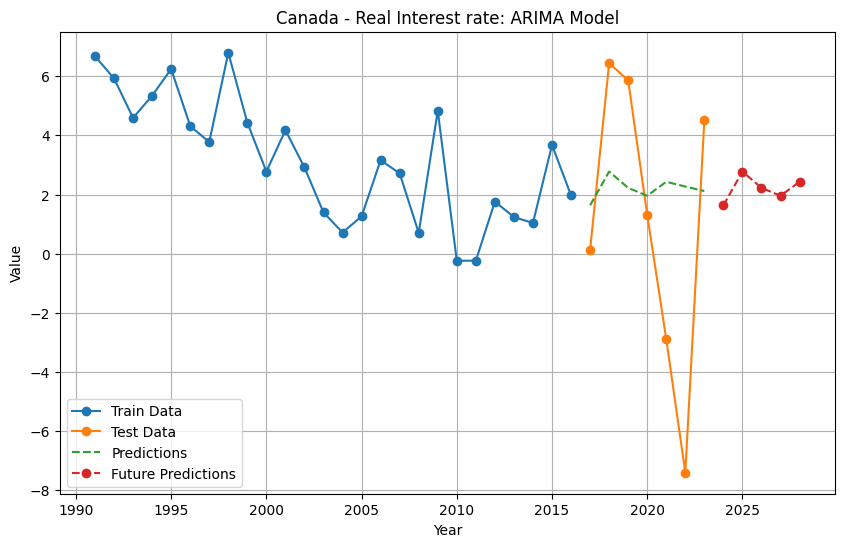

No data found for Germany - Real Interest rate. Skipping...
No data found for France - Real Interest rate. Skipping...
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=164.173, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=169.018, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=162.272, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=162.444, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=164.197, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=160.608, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=162.830, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=161.261, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=161.759, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=159.809, Time=0.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.920 seconds

United Kingdom - Real Interest rate: Optimal ARIMA Model: (0, 0, 1)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Results for United Kingdom - Real Interest rate:
Mean Squared Error: 80.88953862330598
R-squared: -0.7579651751357379
Predictions for the next 5 years:
Year 2024: 3.4501494740840872
Year 2025: 3.1357910862676124
Year 2026: 3.1357910862676124
Year 2027: 3.1357910862676124
Year 2028: 3.1357910862676124
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


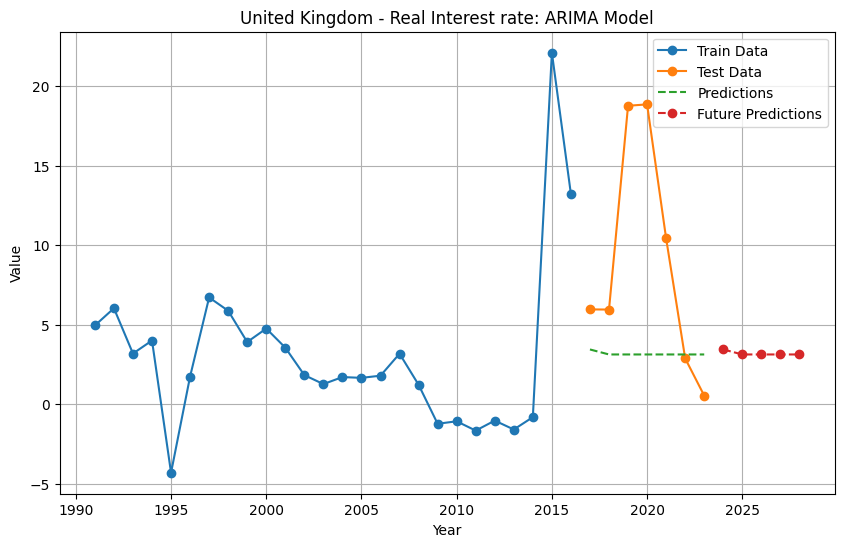

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88.761, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=90.519, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=89.655, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=87.173, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.391 seconds

Italy - Real Interest rate: Optimal ARIMA Model: (0, 1, 0)

Results for Italy - Real Interest rate:
Mean Squared Error: 3.786929592756466
R-squared: -1.8792262967819657
Predictions for the next 5 years:
Year 2024: 2.3353258767356095
Year 2025: 2.3353258767356095
Year 2026: 2.3353258767356095
Year 2027: 2.3353258767356095
Year 2028: 2.3353258767356095
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


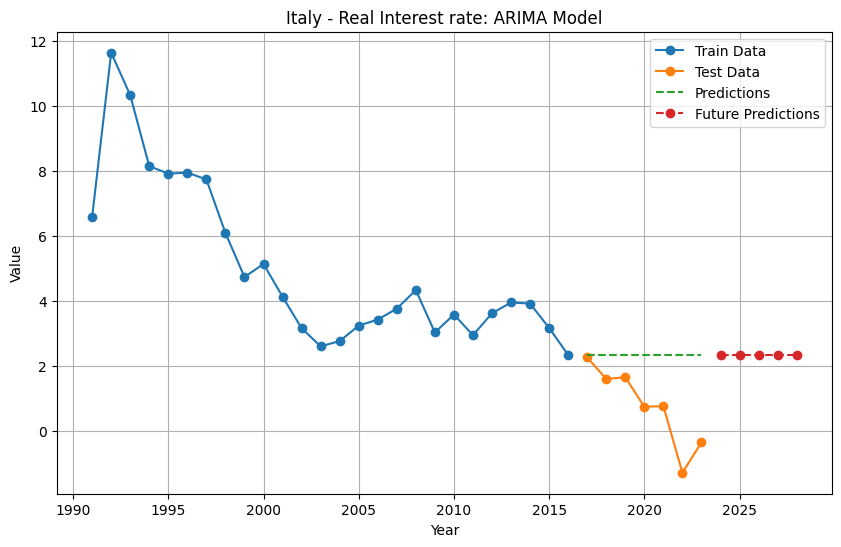

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=132.215, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.488, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=130.566, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=132.392, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=132.199, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.343, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.422 seconds

Japan - Real Interest rate: Optimal ARIMA Model: (1, 0, 0)

Results for Japan - Real Interest rate:
Mean Squared Error: 35.327876026229
R-squared: -5.799195122113396
Predictions for the next 5 years:
Year 2024: 0.45524933048958954
Year 2025: 0.3330992677665442
Year 2026: 0.2437238558204649
Year 2027: 0.1783291758468432
Year 2028: 0.13048084624773135
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


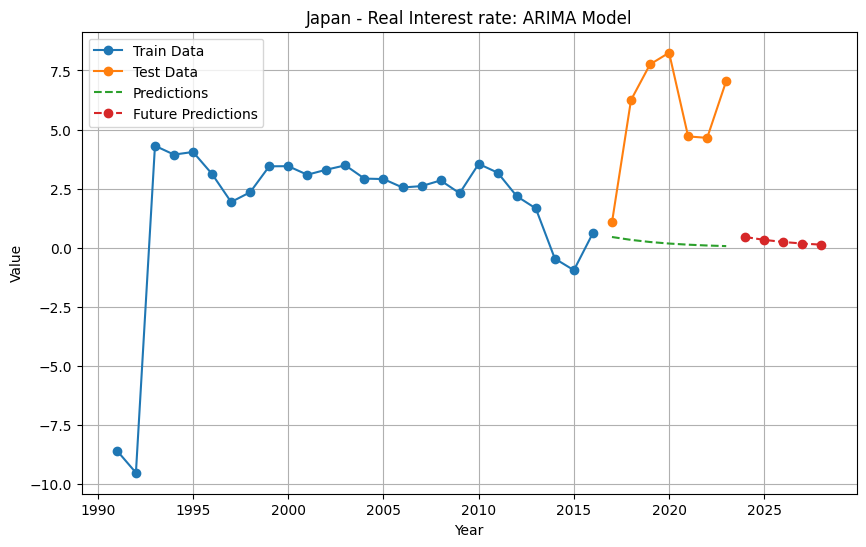

No data found for Netherlands - Real Interest rate. Skipping...
No data found for Sweden - Real Interest rate. Skipping...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=76.704, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=75.712, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74.807, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74.914, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=76.680, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=72.967, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=74.865, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=73.850, Time=0.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=75.424, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.013 seconds

United States - Real Interest rate: Optimal ARIMA Model: (0, 1, 1)

Results for United States - Real Interest rate:
Mean Squared Error: 8.98872229624784
R-squared: -0.105122374421037
Predictions for the next 5 years:
Year 2024: 2.477846641587057
Year 2025: 2.477846641587057
Year 2026: 2.477846641587057
Year 2027: 2.477846641587057
Year 2028: 2.477846641587057
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


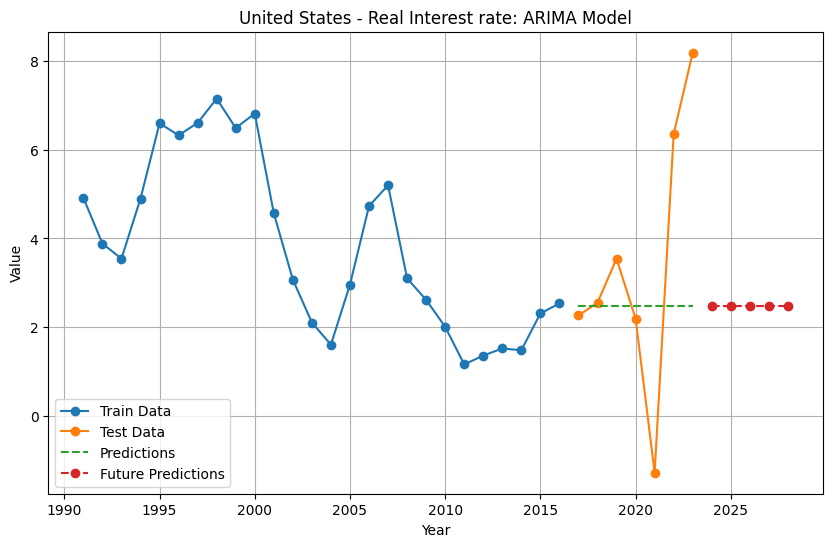

In [48]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def predict_and_evaluate_advanced_arima(df, indicator):
    """
    Function to predict and evaluate time series data for a specific indicator using ARIMA with hyperparameter tuning.
    """
    for country in df['Country Name'].unique():
        country_data = df[(df['Country Name'] == country) & (df['Indicator'] == indicator)]

        # Check if country_data is empty
        if country_data.empty:
            print(f"No data found for {country} - {indicator}. Skipping...")
            continue

        # Extract years and values
        years = country_data.columns[2:-1].astype(int).values
        values = country_data.iloc[:, 2:-1].values[0]

        # Check if there are enough data points
        if len(values) < 10:
            print(f"Not enough data for {country} - {indicator}. Skipping...")
            continue

        # Split data into training and testing sets
        split_point = int(len(values) * 0.8)
        train, test = values[:split_point], values[split_point:]
        test_years = years[split_point:]

        # Automatically tune ARIMA parameters
        try:
            model = auto_arima(
                train,
                start_p=1, start_q=1,
                max_p=5, max_q=5,
                seasonal=False,
                trace=True,  # Logs the model selection process
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )

            # Summary of the model
            print(f"\n{country} - {indicator}: Optimal ARIMA Model: {model.order}\n")

            # Fit the final model
            model_fit = model.fit(train)

            # Forecast on the test set
            predictions = model_fit.predict(n_periods=len(test))
            mse = mean_squared_error(test, predictions)
            r2 = r2_score(test, predictions)

            print(f"Results for {country} - {indicator}:")
            print(f"Mean Squared Error: {mse}")
            print(f"R-squared: {r2}")

            # Predict for the next 5 years
            future_predictions = model_fit.predict(n_periods=5)
            future_years = range(years[-1] + 1, years[-1] + 6)

            print("Predictions for the next 5 years:")
            for year, pred in zip(future_years, future_predictions):
                print(f"Year {year}: {pred}")
            print("-" * 40)

            # Visualization
            plt.figure(figsize=(10, 6))
            plt.plot(years[:split_point], train, label="Train Data", marker="o")
            plt.plot(test_years, test, label="Test Data", marker="o")
            plt.plot(test_years, predictions, label="Predictions", linestyle="--")
            plt.plot(future_years, future_predictions, label="Future Predictions", linestyle="--", marker="o")
            plt.title(f"{country} - {indicator}: ARIMA Model")
            plt.xlabel("Year")
            plt.ylabel("Value")
            plt.legend()
            plt.grid()
            plt.show()

        except Exception as e:
            print(f"ARIMA model failed for {country} - {indicator}: {e}")
            continue

# Loop through indicators
indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Houseolld', 'stock', 'Real Interest rate']

# Call the function for each indicator
for indicator in indicators:
    predict_and_evaluate_advanced_arima(df_developed, indicator)


Lstm

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Metrics calculation
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# LSTM model
def run_lstm(train, test, n_input):
    # Prepare data for LSTM
    def create_sequences(data, n_input):
        sequences = []
        for i in range(len(data) - n_input):
            sequences.append((data[i:i + n_input], data[i + n_input]))
        return sequences

    train_sequences = create_sequences(train, n_input)
    X_train = np.array([seq[0] for seq in train_sequences])
    y_train = np.array([seq[1] for seq in train_sequences])

    # Reshape for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=20, verbose=0)

    # Make predictions
    test_sequences = create_sequences(test, n_input)
    X_test = np.array([seq[0] for seq in test_sequences])
    y_test = np.array([seq[1] for seq in test_sequences])
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    predictions = model.predict(X_test)
    return y_test, predictions.flatten()

# Placeholder for data loading (replace with actual dataset)
data_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/cleaned_dataset(m).csv'
df = pd.read_csv(data_path)

# List of indicators to process
indicators = ['GDP Growth', 'Household', 'Inflation', 'Unemployment', 'Real Interest Rate']

# Classifications to process
classifications = ['Developed', 'Developing', 'Least Developed']

# Filter and process data for each indicator and classification
results = {}
for classification in classifications:
    classification_results = {}
    for indicator in indicators:
        filtered_df = df[['Year', 'Country Name', 'Classification', indicator]].dropna()

        # Filter data by classification
        classified_df = filtered_df[filtered_df['Classification'] == classification]

        # Process each country
        countries = classified_df['Country'].unique()
        country_metrics = {}
        for country in countries:
            country_data = classified_df[classified_df['Country Name'] == country].sort_values(by='Year')
            time_series = country_data[indicator].values

            # Split into train and test
            train_size = int(len(time_series) * 0.8)
            train, test = time_series[:train_size], time_series[train_size:]

            # Run LSTM
            n_input = 5  # Number of time steps to look back
            if len(train) > n_input and len(test) > 0:  # Ensure sufficient data for training and testing
                y_test, predictions = run_lstm(train, test, n_input)

                # Calculate metrics
                rmse, mae, mape = calculate_metrics(y_test, predictions)

                country_metrics[country] = {
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape
                }

        classification_results[indicator] = country_metrics
    results[classification] = classification_results

# Print results
for classification, indicators_metrics in results.items():
    print(f"Results for {classification} Countries:")
    for indicator, countries_metrics in indicators_metrics.items():
        print(f"  Indicator: {indicator}")
        for country, metrics in countries_metrics.items():
            print(f"    Country: {country}")
            print(f"      RMSE: {metrics['RMSE']:.2f}")
            print(f"      MAE: {metrics['MAE']:.2f}")
            print(f"      MAPE: {metrics['MAPE']:.2f}%")
    print()


KeyError: "['Year', 'Classification', 'GDP Growth'] not in index"

Arima

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Metrics calculation
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# ARIMA model
def run_arima(train, test, order):
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    predictions = model_fit.forecast(steps=len(test))
    return test, predictions

# Placeholder for data loading (replace with actual dataset)
data_path = 'path_to_combined_dataset.csv'
df = pd.read_csv(data_path)

# List of indicators to process
indicators = ['GDP Growth', 'Household', 'Inflation', 'Unemployment', 'Real Interest Rate']

# Classifications to process
classifications = ['Developed', 'Developing', 'Least Developed']

# Filter and process data for each indicator and classification
results = {}
for classification in classifications:
    classification_results = {}
    for indicator in indicators:
        filtered_df = df[['Year', 'Country', 'Classification', indicator]].dropna()

        # Filter data by classification
        classified_df = filtered_df[filtered_df['Classification'] == classification]

        # Process each country
        countries = classified_df['Country'].unique()
        country_metrics = {}
        for country in countries:
            country_data = classified_df[classified_df['Country'] == country].sort_values(by='Year')
            time_series = country_data[indicator].values

            # Split into train and test
            train_size = int(len(time_series) * 0.8)
            train, test = time_series[:train_size], time_series[train_size:]

            # Run ARIMA
            order = (1, 1, 1)  # Example order, can be tuned for each indicator
            if len(train) > 1 and len(test) > 0:  # Ensure sufficient data for training and testing
                y_test, predictions = run_arima(train, test, order)

                # Calculate metrics
                rmse, mae, mape = calculate_metrics(y_test, predictions)

                country_metrics[country] = {
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape
                }

        classification_results[indicator] = country_metrics
    results[classification] = classification_results

# Print results
for classification, indicators_metrics in results.items():
    print(f"Results for {classification} Countries:")
    for indicator, countries_metrics in indicators_metrics.items():
        print(f"  Indicator: {indicator}")
        for country, metrics in countries_metrics.items():
            print(f"    Country: {country}")
            print(f"      RMSE: {metrics['RMSE']:.2f}")
            print(f"      MAE: {metrics['MAE']:.2f}")
            print(f"      MAPE: {metrics['MAPE']:.2f}%")
    print()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_combined_dataset.csv'

Sarima

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Metrics calculation
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# SARIMAX model
def run_sarimax(train, test, order, seasonal_order=None, exog_train=None, exog_test=None):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, exog=exog_train)
    model_fit = model.fit(disp=False)

    # Forecast
    predictions = model_fit.forecast(steps=len(test), exog=exog_test)
    return test, predictions

# Placeholder for data loading (replace with actual dataset)
data_path = 'path_to_combined_dataset.csv'
df = pd.read_csv(data_path)

# List of indicators to process
indicators = ['GDP Growth', 'Household', 'Inflation', 'Unemployment', 'Real Interest Rate']

# Classifications to process
classifications = ['Developed', 'Developing', 'Least Developed']

# Filter and process data for each indicator and classification
results = {}
for classification in classifications:
    classification_results = {}
    for indicator in indicators:
        filtered_df = df[['Year', 'Country', 'Classification', indicator]].dropna()

        # Filter data by classification
        classified_df = filtered_df[filtered_df['Classification'] == classification]

        # Process each country
        countries = classified_df['Country'].unique()
        country_metrics = {}
        for country in countries:
            country_data = classified_df[classified_df['Country'] == country].sort_values(by='Year')
            time_series = country_data[indicator].values

            # Split into train and test
            train_size = int(len(time_series) * 0.8)
            train, test = time_series[:train_size], time_series[train_size:]

            # Example of external regressors (replace with actual external data if available)
            exog = None  # Replace with actual exogenous variables if applicable
            exog_train = exog[:train_size] if exog is not None else None
            exog_test = exog[train_size:] if exog is not None else None

            # Run SARIMAX
            order = (1, 1, 1)  # Example order, can be tuned for each indicator
            seasonal_order = (0, 0, 0, 0)  # Example seasonal order, modify as needed
            if len(train) > 1 and len(test) > 0:  # Ensure sufficient data for training and testing
                y_test, predictions = run_sarimax(train, test, order, seasonal_order, exog_train, exog_test)

                # Calculate metrics
                rmse, mae, mape = calculate_metrics(y_test, predictions)

                country_metrics[country] = {
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape
                }

        classification_results[indicator] = country_metrics
    results[classification] = classification_results

# Print results
for classification, indicators_metrics in results.items():
    print(f"Results for {classification} Countries:")
    for indicator, countries_metrics in indicators_metrics.items():
        print(f"  Indicator: {indicator}")
        for country, metrics in countries_metrics.items():
            print(f"    Country: {country}")
            print(f"      RMSE: {metrics['RMSE']:.2f}")
            print(f"      MAE: {metrics['MAE']:.2f}")
            print(f"      MAPE: {metrics['MAPE']:.2f}%")
    print()
